In [1]:
'''Import basic libraries'''
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import os 
#Import dengue datafile
dengue = pd.read_csv("C:/Users/Patrick/Downloads/Dengue_Daily.csv")

In [2]:
# Import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import os 
from pathlib import Path
import sys

def find_project_root(current: Path, marker: str = ".git"):
    for parent in current.resolve().parents:
        if (parent / marker).exists():
            return parent
    return current.resolve()  # fallback

PROJECT_ROOT = find_project_root(Path.cwd())


RAW_DIR = PROJECT_ROOT / "data" / "raw"
INTERIM_DIR = PROJECT_ROOT / "data" / "interim"
PROCESSED_DIR = PROJECT_ROOT / "data" / "processed"

# Load in dengue data

dengue = pd.read_csv(RAW_DIR / "TW_DENGUE" / "Dengue_Daily.csv")

Script to Clean Up Data 

In [3]:
#Checking shape of dengue file
print(dengue.shape)
#Drop imported cases and reset index
dengue_local = dengue[dengue['是否境外移入']=='否'].reset_index(drop=True)
#Checking shape of local dengue cases
print(dengue_local.shape)


(107248, 26)
(102296, 26)


In [29]:
import pandas as pd
from pathlib import Path

# Directory containing the CSV files directly
base_dir = RAW_DIR / "TW_DENGUE"

# Loop through files directly in the directory
for file_path in base_dir.iterdir():
    if file_path.is_file() and file_path.suffix == ".csv":
        # Create a variable name from the filename (remove extension, replace spaces/special chars with underscores)
        var_name = file_path.stem.replace(" ", "_").replace("-", "_").replace("（", "").replace("）", "").replace("(", "").replace(")", "")
        
        for encoding in ["utf-8", "big5"]:
            try:
                globals()[var_name] = pd.read_csv(file_path, encoding=encoding)
                print(f"Loaded {file_path.name} into variable '{var_name}' using {encoding}.")
                break
            except Exception as e:
                print(f"Failed to read {file_path.name} with {encoding}: {e}")


Failed to read BSA_AGE_TN_2015.csv with utf-8: 'utf-8' codec can't decode byte 0xa4 in position 0: invalid start byte
Loaded BSA_AGE_TN_2015.csv into variable 'BSA_AGE_TN_2015' using big5.
Loaded BSA_AGE_TN_2023.csv into variable 'BSA_AGE_TN_2023' using utf-8.
Failed to read BSA_DEM_TN_2015.csv with utf-8: 'utf-8' codec can't decode byte 0xa4 in position 0: invalid start byte
Loaded BSA_DEM_TN_2015.csv into variable 'BSA_DEM_TN_2015' using big5.
Loaded BSA_DEM_TN_2023.csv into variable 'BSA_DEM_TN_2023' using utf-8.
Failed to read BSA_POP_TN_2015.csv with utf-8: 'utf-8' codec can't decode byte 0xa4 in position 0: invalid start byte
Loaded BSA_POP_TN_2015.csv into variable 'BSA_POP_TN_2015' using big5.
Loaded BSA_POP_TN_2023.csv into variable 'BSA_POP_TN_2023' using utf-8.
Loaded Dengue_Daily.csv into variable 'Dengue_Daily' using utf-8.
Loaded VIL_AGE_TN_2015.csv into variable 'VIL_AGE_TN_2015' using utf-8.
Loaded VIL_AGE_TN_2023.csv into variable 'VIL_AGE_TN_2023' using utf-8.
Loaded 

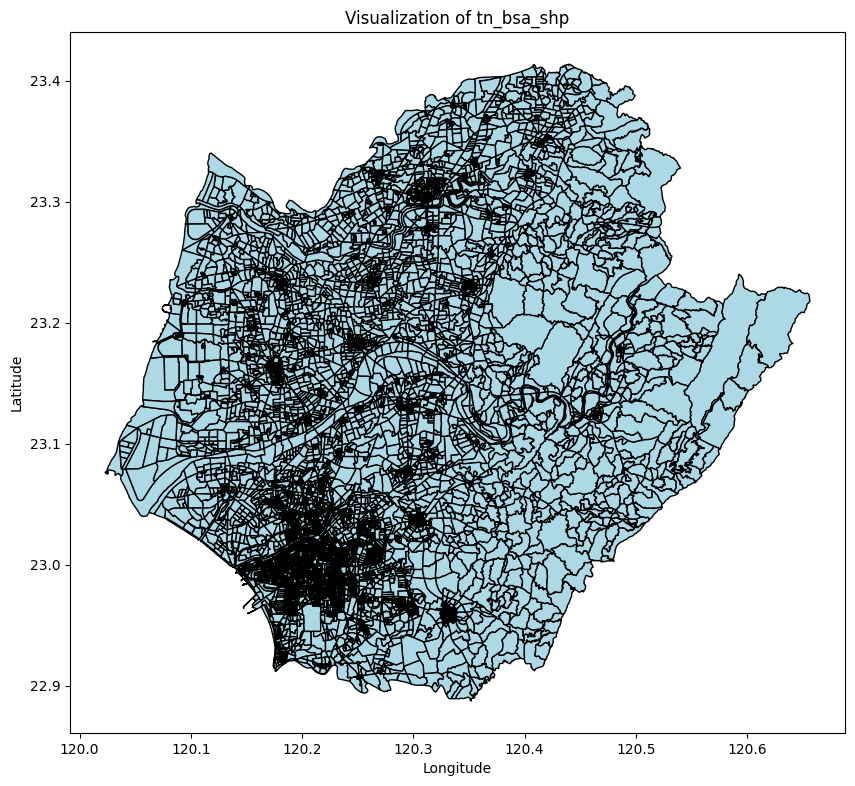

In [124]:
# Read in Tainan shapefile
tn_bsa_shp = gpd.read_file(r'D:\Projects\TMU\gee_dengue\data\external\SHP_TN')
tn_bsa_shp = tn_bsa_shp.to_crs(epsg=4326)
fig, ax = plt.subplots(figsize=(10, 10))
tn_bsa_shp.plot(ax=ax, color='lightblue', edgecolor='black')
plt.title("Visualization of tn_bsa_shp")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [125]:
import pandas as pd

# Columns to merge
age_cols = ['A0A9_CNT', 'A0A9_M_CNT', 'A0A9_F_CNT',
            'A10A19_CNT', 'A10A19_M_CNT', 'A10A19_F_CNT', 'A20A29_CNT',
            'A20A29_M_CNT', 'A20A29_F_CNT', 'A30A39_CNT', 'A30A39_M_CNT',
            'A30A39_F_CNT', 'A40A49_CNT', 'A40A49_M_CNT', 'A40A49_F_CNT',
            'A50A59_CNT', 'A50A59_M_CNT', 'A50A59_F_CNT', 'A60A69_CNT',
            'A60A69_M_CNT', 'A60A69_F_CNT', 'A70A79_CNT', 'A70A79_M_CNT',
            'A70A79_F_CNT', 'A80A89_CNT', 'A80A89_M_CNT', 'A80A89_F_CNT',
            'A90A99_CNT', 'A90A99_M_CNT', 'A90A99_F_CNT', 'A100UP_10_CNT',
            'A100UP_M_10_CNT', 'A100UP_F_10_CNT']

pop_cols = ['H_CNT', 'P_CNT', 'M_CNT', 'F_CNT']

# Function to merge with prefix
def merge_with_prefix(base_df, merge_df, cols, year_prefix):
    temp_df = merge_df[['CODEBASE'] + cols].copy()
    temp_df = temp_df.rename(columns={col: f'{year_prefix}{col}' for col in cols})
    return base_df.merge(temp_df, on='CODEBASE', how='left')

# Merge AGE 2023
tn_bsa_shp = merge_with_prefix(tn_bsa_shp, BSA_AGE_TN_2023, age_cols, 'Y2023_')

# Merge AGE 2015
tn_bsa_shp = merge_with_prefix(tn_bsa_shp, BSA_AGE_TN_2015, age_cols, 'Y2015_')

# Merge POP 2023
tn_bsa_shp = merge_with_prefix(tn_bsa_shp, BSA_POP_TN_2023, pop_cols, 'Y2023_')

# Merge POP 2015
tn_bsa_shp = merge_with_prefix(tn_bsa_shp, BSA_POP_TN_2015, pop_cols, 'Y2015_')


In [127]:
# Tally infections per region code
dengue_2015_counts = local_tn_Dengue_2015['最小統計區'].value_counts().reset_index()
dengue_2015_counts.columns = ['CODEBASE', 'Y2015_dengue']

dengue_2023_counts = local_tn_Dengue_2023['最小統計區'].value_counts().reset_index()
dengue_2023_counts.columns = ['CODEBASE', 'Y2023_dengue']

# Merge the counts into the shapefile GeoDataFrame
tn_bsa_shp = tn_bsa_shp.merge(dengue_2015_counts, on='CODEBASE', how='left')
tn_bsa_shp = tn_bsa_shp.merge(dengue_2023_counts, on='CODEBASE', how='left')

# Optional: Fill NaN with 0 (regions with zero cases)
tn_bsa_shp['Y2015_dengue'] = tn_bsa_shp['Y2015_dengue'].fillna(0).astype(int)
tn_bsa_shp['Y2023_dengue'] = tn_bsa_shp['Y2023_dengue'].fillna(0).astype(int)

In [129]:
print(list(tn_bsa_shp.columns))

['U_ID', 'CODEBASE', 'CODE1', 'CODE2', 'TOWN_ID', 'TOWN', 'COUNTY_ID', 'COUNTY', 'X', 'Y', 'AREA', 'geometry', 'Y2023_A0A9_CNT', 'Y2023_A0A9_M_CNT', 'Y2023_A0A9_F_CNT', 'Y2023_A10A19_CNT', 'Y2023_A10A19_M_CNT', 'Y2023_A10A19_F_CNT', 'Y2023_A20A29_CNT', 'Y2023_A20A29_M_CNT', 'Y2023_A20A29_F_CNT', 'Y2023_A30A39_CNT', 'Y2023_A30A39_M_CNT', 'Y2023_A30A39_F_CNT', 'Y2023_A40A49_CNT', 'Y2023_A40A49_M_CNT', 'Y2023_A40A49_F_CNT', 'Y2023_A50A59_CNT', 'Y2023_A50A59_M_CNT', 'Y2023_A50A59_F_CNT', 'Y2023_A60A69_CNT', 'Y2023_A60A69_M_CNT', 'Y2023_A60A69_F_CNT', 'Y2023_A70A79_CNT', 'Y2023_A70A79_M_CNT', 'Y2023_A70A79_F_CNT', 'Y2023_A80A89_CNT', 'Y2023_A80A89_M_CNT', 'Y2023_A80A89_F_CNT', 'Y2023_A90A99_CNT', 'Y2023_A90A99_M_CNT', 'Y2023_A90A99_F_CNT', 'Y2023_A100UP_10_CNT', 'Y2023_A100UP_M_10_CNT', 'Y2023_A100UP_F_10_CNT', 'Y2015_A0A9_CNT', 'Y2015_A0A9_M_CNT', 'Y2015_A0A9_F_CNT', 'Y2015_A10A19_CNT', 'Y2015_A10A19_M_CNT', 'Y2015_A10A19_F_CNT', 'Y2015_A20A29_CNT', 'Y2015_A20A29_M_CNT', 'Y2015_A20A29_F_CN

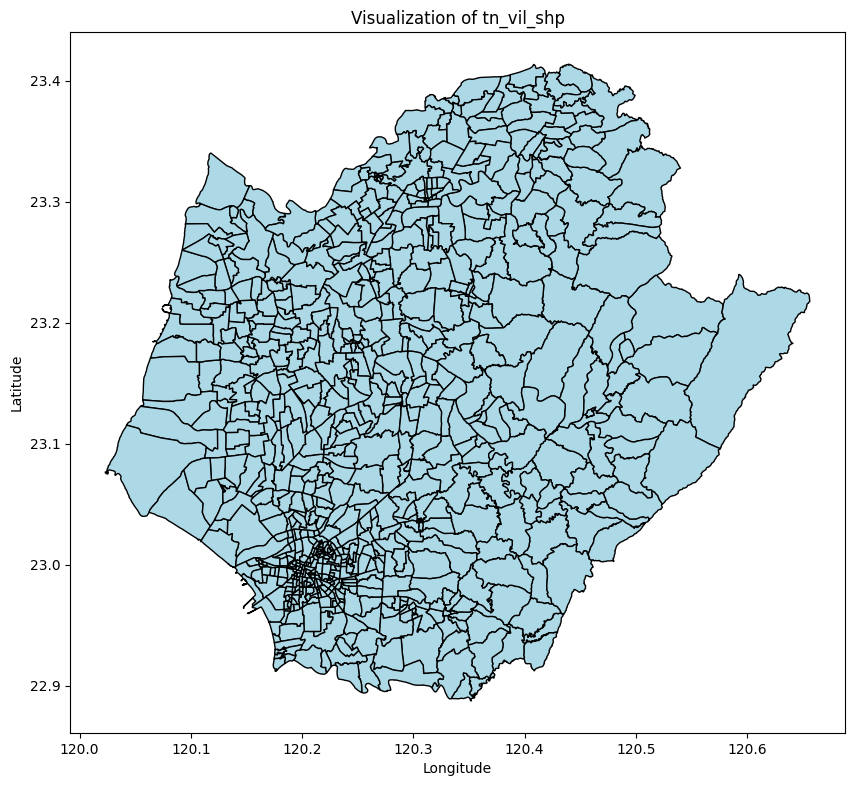

In [210]:
# Read in Tainan shapefile
tn_vil_shp = gpd.read_file(r'D:\Projects\TMU\gee_dengue\data\external\10tnvillage')
tn_vil_shp = tn_vil_shp.to_crs(epsg=4326)
fig, ax = plt.subplots(figsize=(10, 10))
tn_vil_shp.plot(ax=ax, color='lightblue', edgecolor='black')
plt.title("Visualization of tn_vil_shp")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [153]:
VIL_AGE_TN_2015 = VIL_AGE_TN_2015.rename(columns={'V_ID': 'VILLAGE_ID'})
VIL_POP_TN_2015 = VIL_POP_TN_2015.rename(columns={'V_ID': 'VILLAGE_ID'})
VIL_AGE_TN_2023 = VIL_AGE_TN_2023.rename(columns={'V_ID': 'VILLAGE_ID'})
VIL_POP_TN_2023 = VIL_POP_TN_2023.rename(columns={'V_ID': 'VILLAGE_ID'})

In [196]:
VIL_AGE_TN_2023

,COUNTY_ID,COUNTY,TOWN_ID,TOWN,VILLAGE_ID,VILLAGE,A0A9_CNT,A0A9_M_CNT,A0A9_F_CNT,A10A19_CNT,A10A19_M_CNT,A10A19_F_CNT,A20A29_CNT,A20A29_M_CNT,A20A29_F_CNT,A30A39_CNT,A30A39_M_CNT,A30A39_F_CNT,A40A49_CNT,A40A49_M_CNT,A40A49_F_CNT,A50A59_CNT,A50A59_M_CNT,A50A59_F_CNT,A60A69_CNT,A60A69_M_CNT,A60A69_F_CNT,A70A79_CNT,A70A79_M_CNT,A70A79_F_CNT,A80A89_CNT,A80A89_M_CNT,A80A89_F_CNT,A90A99_CNT,A90A99_M_CNT,A90A99_F_CNT,A100UP_CNT,A100UP_M_CNT,A100UP_F_CNT,INFO_TIME
0,縣市代碼,縣市名稱,鄉鎮市區代碼,鄉鎮市區名稱,村里代碼,村里名稱,0-9歲人口數,0-9歲男性人口數,0-9歲女性人口數,10-19歲人口數,10-19歲男性人口數,10-19歲女性人口數,20-29歲人口數,20-29歲男性人口數,20-29歲女性人口數,30-39歲人口數,30-39歲男性人口數,30-39歲女性人口數,40-49歲人口數,40-49歲男性人口數,40-49歲女性人口數,50-59歲人口數,50-59歲男性人口數,50-59歲女性人口數,60-69歲人口數,60-69歲男性人口數,60-69歲女性人口數,70-79歲人口數,70-79歲男性人口數,70-79歲女性人口數,80-89歲人口數,80-89歲男性人口數,80-89歲女性人口數,90-99歲人口數,90-99歲男性人口數,90-99歲女性人口數,100歲以上人口數,100歲以上男性人口數,100歲以上女性人口數,資料時間
1,67000,臺南市,67000010,新營區,67000010-001,忠政里,328,173,155,375,171,204,546,309,237,647,329,318,712,340,372,704,338,366,935,409,526,578,268,310,259,116,143,46,13,33,2,1,1,112Y12M
2,67000,臺南市,67000010,新營區,67000010-002,民權里,256,138,118,229,125,104,266,137,129,296,152,144,358,161,197,400,188,212,359,174,185,289,141,148,155,69,86,44,18,26,2,1,1,112Y12M
3,67000,臺南市,67000010,新營區,67000010-003,三仙里,168,78,90,245,133,112,355,184,171,382,196,186,452,205,247,453,222,231,476,238,238,356,158,198,187,76,111,26,6,20,0,0,0,112Y12M
4,67000,臺南市,67000010,新營區,67000010-007,大宏里,312,173,139,412,211,201,291,154,137,391,197,194,462,211,251,450,217,233,514,247,267,369,185,184,174,66,108,46,19,27,1,0,1,112Y12M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,67000,臺南市,67000370,中西區,67000370-044,兌悅里,190,90,100,259,136,123,467,266,201,516,276,240,667,368,299,722,369,353,701,375,326,427,213,214,234,90,144,34,15,19,0,0,0,112Y12M
646,67000,臺南市,67000370,中西區,67000370-045,淺草里,113,62,51,158,70,88,256,128,128,329,167,162,468,228,240,477,228,249,444,219,225,313,157,156,100,34,66,34,14,20,1,0,1,112Y12M
647,67000,臺南市,67000370,中西區,67000370-046,府前里,88,34,54,91,37,54,201,108,93,252,133,119,323,162,161,339,162,177,374,195,179,246,121,125,115,51,64,21,3,18,0,0,0,112Y12M
648,67000,臺南市,67000370,中西區,67000370-047,南廠里,158,76,82,210,117,93,392,207,185,501,279,222,609,332,277,707,360,347,737,373,364,473,218,255,239,84,155,49,16,33,1,0,1,112Y12M


In [212]:
tn_vil_shp['merge_key'] = tn_vil_shp['TOWN_ID'] + '-' + tn_vil_shp['VILLAGE_ID']

In [213]:
columns_to_transfer = ['A0A9_CNT', 'A0A9_M_CNT', 'A0A9_F_CNT', 'A10A19_CNT', 'A10A19_M_CNT',
                       'A10A19_F_CNT', 'A20A29_CNT', 'A20A29_M_CNT', 'A20A29_F_CNT',
                       'A30A39_CNT', 'A30A39_M_CNT', 'A30A39_F_CNT', 'A40A49_CNT',
                       'A40A49_M_CNT', 'A40A49_F_CNT', 'A50A59_CNT', 'A50A59_M_CNT',
                       'A50A59_F_CNT', 'A60A69_CNT', 'A60A69_M_CNT', 'A60A69_F_CNT',
                       'A70A79_CNT', 'A70A79_M_CNT', 'A70A79_F_CNT', 'A80A89_CNT',
                       'A80A89_M_CNT', 'A80A89_F_CNT', 'A90A99_CNT', 'A90A99_M_CNT',
                       'A90A99_F_CNT', 'A100UP_CNT', 'A100UP_M_CNT', 'A100UP_F_CNT']

# For 2023
vil_2023 = VIL_AGE_TN_2023[['VILLAGE_ID'] + columns_to_transfer].copy()
vil_2023.rename(columns={col: f'Y2023_{col}' for col in columns_to_transfer}, inplace=True)

tn_vil_shp = tn_vil_shp.merge(
    vil_2023,
    left_on='merge_key',
    right_on='VILLAGE_ID',
    how='left',
    suffixes=('', '_drop')  # Prevent _x, _y clutter
)

tn_vil_shp.drop(columns=[col for col in tn_vil_shp.columns if col.endswith('_drop')], inplace=True)

# For 2015
vil_2015 = VIL_AGE_TN_2015[['VILLAGE_ID'] + columns_to_transfer].copy()
vil_2015.rename(columns={col: f'Y2015_{col}' for col in columns_to_transfer}, inplace=True)

tn_vil_shp = tn_vil_shp.merge(
    vil_2015,
    left_on='merge_key',
    right_on='VILLAGE_ID',
    how='left',
    suffixes=('', '_drop')
)

tn_vil_shp.drop(columns=[col for col in tn_vil_shp.columns if col.endswith('_drop')], inplace=True)


In [214]:
tn_vil_shp.columns

Index(['ID', 'OBJECTID_1', 'VILLAGE', 'TOWN', 'COUNTY', 'VILLAGE_ID',
       'TOWN_ID', 'COUNTY_ID', 'TV_ALL', 'VILLCODE', 'ORI_VILLAG', 'AREA',
       'MAX_X', 'MAX_Y', 'MIN_X', 'MIN_Y', 'X', 'Y', 'V_ID', 'SORT',
       'COUNTYNAME', 'TOWNNAME', 'OBJECTID', 'ORIG_FID', 'Shape_Leng',
       'Shape_Le_1', 'Shape_Area', 'ET_ID', 'geometry', 'merge_key',
       'Y2023_A0A9_CNT', 'Y2023_A0A9_M_CNT', 'Y2023_A0A9_F_CNT',
       'Y2023_A10A19_CNT', 'Y2023_A10A19_M_CNT', 'Y2023_A10A19_F_CNT',
       'Y2023_A20A29_CNT', 'Y2023_A20A29_M_CNT', 'Y2023_A20A29_F_CNT',
       'Y2023_A30A39_CNT', 'Y2023_A30A39_M_CNT', 'Y2023_A30A39_F_CNT',
       'Y2023_A40A49_CNT', 'Y2023_A40A49_M_CNT', 'Y2023_A40A49_F_CNT',
       'Y2023_A50A59_CNT', 'Y2023_A50A59_M_CNT', 'Y2023_A50A59_F_CNT',
       'Y2023_A60A69_CNT', 'Y2023_A60A69_M_CNT', 'Y2023_A60A69_F_CNT',
       'Y2023_A70A79_CNT', 'Y2023_A70A79_M_CNT', 'Y2023_A70A79_F_CNT',
       'Y2023_A80A89_CNT', 'Y2023_A80A89_M_CNT', 'Y2023_A80A89_F_CNT',
       'Y2023

In [215]:
import pandas as pd

# Step 1: Copy and rename columns with 'Y2015_' prefix
cols_to_add = ['H_CNT', 'P_CNT', 'M_CNT', 'F_CNT']

# Rename columns with prefix
VIL_POP_2015_renamed = VIL_POP_TN_2015[['VILLAGE_ID'] + cols_to_add].copy()
VIL_POP_2015_renamed = VIL_POP_2015_renamed.rename(
    columns={col: f'Y2015_{col}' for col in cols_to_add}
)

# Step 2: Merge (avoid extra 'VILLAGE_ID' clutter)
tn_vil_shp = tn_vil_shp.merge(
    VIL_POP_2015_renamed,
    left_on='merge_key',
    right_on='VILLAGE_ID',
    how='left',
    suffixes=('', '_drop')  # avoid _x, _y
)

# Step 3: Drop extra columns from right-side dataframe
tn_vil_shp.drop(columns=[col for col in tn_vil_shp.columns if col.endswith('_drop') or col == 'VILLAGE_ID'], inplace=True)


In [218]:
# Step 1: Copy and rename columns with 'Y2023_' prefix
cols_to_add = ['H_CNT', 'P_CNT', 'M_CNT', 'F_CNT']

# Rename columns with prefix
VIL_POP_2023_renamed = VIL_POP_TN_2023[['VILLAGE_ID'] + cols_to_add].copy()
VIL_POP_2023_renamed = VIL_POP_2023_renamed.rename(
    columns={col: f'Y2023_{col}' for col in cols_to_add}
)

# Step 2: Merge (avoid extra 'VILLAGE_ID' clutter)
tn_vil_shp = tn_vil_shp.merge(
    VIL_POP_2023_renamed,
    left_on='merge_key',
    right_on='VILLAGE_ID',
    how='left',
    suffixes=('', '_drop')  # avoid _x, _y
)

# Step 3: Drop extra columns from right-side dataframe
tn_vil_shp.drop(columns=[col for col in tn_vil_shp.columns if col.endswith('_drop') or col == 'VILLAGE_ID'], inplace=True)


In [221]:
tn_vil_shp

,ID,OBJECTID_1,VILLAGE,TOWN,COUNTY,TOWN_ID,COUNTY_ID,TV_ALL,VILLCODE,ORI_VILLAG,AREA,MAX_X,MAX_Y,MIN_X,MIN_Y,X,Y,V_ID,SORT,COUNTYNAME,TOWNNAME,OBJECTID,ORIG_FID,Shape_Leng,Shape_Le_1,Shape_Area,ET_ID,geometry,merge_key,Y2023_A0A9_CNT,Y2023_A0A9_M_CNT,Y2023_A0A9_F_CNT,Y2023_A10A19_CNT,Y2023_A10A19_M_CNT,Y2023_A10A19_F_CNT,Y2023_A20A29_CNT,Y2023_A20A29_M_CNT,Y2023_A20A29_F_CNT,Y2023_A30A39_CNT,Y2023_A30A39_M_CNT,Y2023_A30A39_F_CNT,Y2023_A40A49_CNT,Y2023_A40A49_M_CNT,Y2023_A40A49_F_CNT,Y2023_A50A59_CNT,Y2023_A50A59_M_CNT,Y2023_A50A59_F_CNT,Y2023_A60A69_CNT,Y2023_A60A69_M_CNT,Y2023_A60A69_F_CNT,Y2023_A70A79_CNT,Y2023_A70A79_M_CNT,Y2023_A70A79_F_CNT,Y2023_A80A89_CNT,Y2023_A80A89_M_CNT,Y2023_A80A89_F_CNT,Y2023_A90A99_CNT,Y2023_A90A99_M_CNT,Y2023_A90A99_F_CNT,Y2023_A100UP_CNT,Y2023_A100UP_M_CNT,Y2023_A100UP_F_CNT,Y2015_A0A9_CNT,Y2015_A0A9_M_CNT,Y2015_A0A9_F_CNT,Y2015_A10A19_CNT,Y2015_A10A19_M_CNT,Y2015_A10A19_F_CNT,Y2015_A20A29_CNT,Y2015_A20A29_M_CNT,Y2015_A20A29_F_CNT,Y2015_A30A39_CNT,Y2015_A30A39_M_CNT,Y2015_A30A39_F_CNT,Y2015_A40A49_CNT,Y2015_A40A49_M_CNT,Y2015_A40A49_F_CNT,Y2015_A50A59_CNT,Y2015_A50A59_M_CNT,Y2015_A50A59_F_CNT,Y2015_A60A69_CNT,Y2015_A60A69_M_CNT,Y2015_A60A69_F_CNT,Y2015_A70A79_CNT,Y2015_A70A79_M_CNT,Y2015_A70A79_F_CNT,Y2015_A80A89_CNT,Y2015_A80A89_M_CNT,Y2015_A80A89_F_CNT,Y2015_A90A99_CNT,Y2015_A90A99_M_CNT,Y2015_A90A99_F_CNT,Y2015_A100UP_CNT,Y2015_A100UP_M_CNT,Y2015_A100UP_F_CNT,Y2015_H_CNT,Y2015_P_CNT,Y2015_M_CNT,Y2015_F_CNT,Y2023_H_CNT,Y2023_P_CNT,Y2023_M_CNT,Y2023_F_CNT
0,None,4377,內角里,白河區,臺南市,67000030,67000,白河區內角里,A6703-022-00,None,5.060602e+06,194875.6094,2.590210e+06,191611.3157,2.587656e+06,193316.0265,2.588919e+06,67000030-022,4.0,None,None,0,0,0.0,10371.873803,5.060602e+06,4375,"POLYGON ((120.43652 23.41263, 120.43654 23.412...",67000030-022,20,17,3,33,21,12,53,35,18,68,42,26,92,57,35,93,60,33,135,85,50,80,41,39,68,29,39,18,5,13,0,0,0,36,22,14,53,32,21,93,53,40,105,57,48,96,60,36,138,84,54,112,64,48,104,52,52,58,20,38,8,2,6,0,0,0,334,803,446,357,306,660,392,268
1,None,4378,蓮潭里,白河區,臺南市,67000030,67000,白河區蓮潭里,A6703-017-00,None,4.085859e+06,190565.6738,2.590189e+06,187096.4815,2.588026e+06,188850.9894,2.589012e+06,67000030-017,4.0,None,None,0,0,0.0,10117.167850,4.085859e+06,4376,"POLYGON ((120.40732 23.41229, 120.40751 23.412...",67000030-017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,26,27,94,48,46,128,73,55,140,73,67,122,74,48,170,98,72,132,81,51,90,39,51,77,28,49,2,0,2,0,0,0,354,1008,540,468,NaN,NaN,NaN,NaN
2,None,4379,草店里,白河區,臺南市,67000030,67000,白河區草店里,A6703-023-00,None,4.212266e+06,193819.2188,2.589503e+06,190486.9104,2.586876e+06,191839.8186,2.588119e+06,67000030-023,4.0,None,None,0,0,0.0,12639.008303,4.212266e+06,4377,"POLYGON ((120.42996 23.40641, 120.4301 23.4064...",67000030-023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,17,23,96,45,51,108,50,58,134,75,59,143,73,70,158,101,57,127,65,62,92,47,45,73,33,40,9,2,7,0,0,0,384,980,508,472,NaN,NaN,NaN,NaN
3,None,4380,詔安里,白河區,臺南市,67000030,67000,白河區詔安里,A6703-015-00,None,1.840815e+06,191048.7910,2.589375e+06,189384.3438,2.587185e+06,190190.1797,2.588177e+06,67000030-015,4.0,None,None,0,0,0.0,7924.371195,1.840815e+06,4378,"POLYGON ((120.41847 23.40612, 120.41857 23.405...",67000030-015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,29,31,101,56,45,110,50,60,138,74,64,132,72,60,186,113,73,110,62,48,92,34,58,70,31,39,4,1,3,1,0,1,371,1004,522,482,NaN,NaN,NaN,NaN
4,None,4381,嘉田里,後壁區,臺南市,67000050,67000,後壁區嘉田里,A6705-005-00,None,3.468361e+06,188535.3729,2.589238e+06,185946.0020,2.586081e+06,187109.3847,2.587550e+06,67000050-005,4.0,None,None,0,0,0.0,11353.387029,3.468361e+06,4379,"POLYGON ((120.38221 23.40378, 120.3823 23.4038...",67000050-005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [222]:
# Tally infections per region code (both using 'merge_key' for consistency)
dengue_2015_counts = local_tn_Dengue_2015['感染村里代碼'].value_counts().reset_index()
dengue_2015_counts.columns = ['merge_key', 'Y2015_dengue']

dengue_2023_counts = local_tn_Dengue_2023['感染村里代碼'].value_counts().reset_index()
dengue_2023_counts.columns = ['merge_key', 'Y2023_dengue']

# Merge the counts into the shapefile GeoDataFrame
tn_vil_shp = tn_vil_shp.merge(dengue_2015_counts, on='merge_key', how='left')
tn_vil_shp = tn_vil_shp.merge(dengue_2023_counts, on='merge_key', how='left')

# Optional: Fill NaN with 0 (regions with zero cases)
tn_vil_shp['Y2015_dengue'] = tn_vil_shp['Y2015_dengue'].fillna(0).astype(int)
tn_vil_shp['Y2023_dengue'] = tn_vil_shp['Y2023_dengue'].fillna(0).astype(int)


In [228]:
tn_vil_shp = tn_vil_shp.drop(columns=['Y2015_dengue','Y2023_dengue'])

In [ ]:
tn_vil_shp

array([0])

In [176]:
VIL_AGE_2015_renamed = VIL_AGE_TN_2015[['VILLAGE_ID'] + cols_to_add].copy()
VIL_AGE_2015_renamed = VIL_AGE_2015_renamed.rename(
    columns={col: f'Y2015_{col}' for col in cols_to_add})

tn_vil_shp = tn_vil_shp.merge(
    VIL_AGE_2015_renamed,
    left_on='merge_key',
    right_on='VILLAGE_ID',
    how='left'
)

In [190]:
tn_vil_shp = tn_vil_shp.drop(columns=['VILLAGE_ID_x','VILLAGE_ID_y'])

In [230]:
tn_vil_shp_copy = tn_vil_shp.copy()

In [231]:
# Step 2: Convert the infection dataframe to a GeoDataFrame
geometry = [Point(xy) for xy in zip(local_tn_Dengue_2015['最小統計區中心點X'], local_tn_Dengue_2015['最小統計區中心點Y'])]
dengue_gdf = gpd.GeoDataFrame(local_tn_Dengue_2015, geometry=geometry)

# Step 3: Ensure both GeoDataFrames have the same CRS (coordinate reference system)
dengue_gdf.set_crs(tn_vil_shp.crs, inplace=True)  # or set_crs('EPSG:xxxx') if you know the CRS

# Step 4: Spatial join to find which polygon each point falls into
joined = gpd.sjoin(dengue_gdf, tn_vil_shp, how='inner', predicate='within')

# Step 5: Tally infections per polygon (assuming 'village_id' column in tn_vil_shp identifies polygons)
infection_counts = joined.groupby('index_right').size()

# Step 6: Add infection counts back to the shapefile dataframe
tn_vil_shp['infection_count'] = tn_vil_shp.index.map(infection_counts).fillna(0).astype(int)

In [234]:
tn_vil_shp = tn_vil_shp.rename(columns={'infection_count':'Y2015_Dengue'})

In [235]:
# Step 2: Convert the infection dataframe to a GeoDataFrame
geometry = [Point(xy) for xy in zip(local_tn_Dengue_2023['最小統計區中心點X'], local_tn_Dengue_2023['最小統計區中心點Y'])]
dengue_gdf = gpd.GeoDataFrame(local_tn_Dengue_2023, geometry=geometry)

# Step 3: Ensure both GeoDataFrames have the same CRS (coordinate reference system)
dengue_gdf.set_crs(tn_vil_shp.crs, inplace=True)  # or set_crs('EPSG:xxxx') if you know the CRS

# Step 4: Spatial join to find which polygon each point falls into
joined = gpd.sjoin(dengue_gdf, tn_vil_shp, how='inner', predicate='within')

# Step 5: Tally infections per polygon (assuming 'village_id' column in tn_vil_shp identifies polygons)
infection_counts = joined.groupby('index_right').size()

# Step 6: Add infection counts back to the shapefile dataframe
tn_vil_shp['Y2023_Dengue'] = tn_vil_shp.index.map(infection_counts).fillna(0).astype(int)

In [237]:
ovitrap_gdf = gpd.GeoDataFrame(
    ovitrap_2023, 
    geometry=gpd.points_from_xy(ovitrap_2023['lon'], ovitrap_2023['lat']),
    crs="EPSG:4326"  # Assuming WGS84; change if needed
)
# Load the polygons shapefile
tn_vil_gdf = tn_vil_shp.copy()

# Spatial join: add polygon info to each ovitrap point
joined = gpd.sjoin(ovitrap_gdf, tn_vil_gdf, how="inner", predicate="within")

# Group by polygon index and calculate mean eggs count
mean_eggs = joined.groupby(joined.index_right)['AvgEggs'].mean()

# Create a new column in shapefile and fill it with mean egg counts
tn_vil_gdf['Y2023_Ovitrap'] = tn_vil_gdf.index.map(mean_eggs)

# Optional: fill NaNs with 0 or any default if some polygons have no traps
tn_vil_gdf['Y2023_Ovitrap'] = tn_vil_gdf['Y2023_Ovitrap'].fillna(0)

In [239]:
tn_vil_gdf = tn_vil_gdf.rename(columns={'merge_key':'VILLAGE_ID'})

In [241]:
tn_vil_gdf.to_file("tn_vil_dengue_ovitrap.geojson", driver='GeoJSON')

In [240]:
tn_vil_gdf

,ID,OBJECTID_1,VILLAGE,TOWN,COUNTY,TOWN_ID,COUNTY_ID,TV_ALL,VILLCODE,ORI_VILLAG,AREA,MAX_X,MAX_Y,MIN_X,MIN_Y,X,Y,V_ID,SORT,COUNTYNAME,TOWNNAME,OBJECTID,ORIG_FID,Shape_Leng,Shape_Le_1,Shape_Area,ET_ID,geometry,VILLAGE_ID,Y2023_A0A9_CNT,Y2023_A0A9_M_CNT,Y2023_A0A9_F_CNT,Y2023_A10A19_CNT,Y2023_A10A19_M_CNT,Y2023_A10A19_F_CNT,Y2023_A20A29_CNT,Y2023_A20A29_M_CNT,Y2023_A20A29_F_CNT,Y2023_A30A39_CNT,Y2023_A30A39_M_CNT,Y2023_A30A39_F_CNT,Y2023_A40A49_CNT,Y2023_A40A49_M_CNT,Y2023_A40A49_F_CNT,Y2023_A50A59_CNT,Y2023_A50A59_M_CNT,Y2023_A50A59_F_CNT,Y2023_A60A69_CNT,Y2023_A60A69_M_CNT,Y2023_A60A69_F_CNT,Y2023_A70A79_CNT,Y2023_A70A79_M_CNT,Y2023_A70A79_F_CNT,Y2023_A80A89_CNT,Y2023_A80A89_M_CNT,Y2023_A80A89_F_CNT,Y2023_A90A99_CNT,Y2023_A90A99_M_CNT,Y2023_A90A99_F_CNT,Y2023_A100UP_CNT,Y2023_A100UP_M_CNT,Y2023_A100UP_F_CNT,Y2015_A0A9_CNT,Y2015_A0A9_M_CNT,Y2015_A0A9_F_CNT,Y2015_A10A19_CNT,Y2015_A10A19_M_CNT,Y2015_A10A19_F_CNT,Y2015_A20A29_CNT,Y2015_A20A29_M_CNT,Y2015_A20A29_F_CNT,Y2015_A30A39_CNT,Y2015_A30A39_M_CNT,Y2015_A30A39_F_CNT,Y2015_A40A49_CNT,Y2015_A40A49_M_CNT,Y2015_A40A49_F_CNT,Y2015_A50A59_CNT,Y2015_A50A59_M_CNT,Y2015_A50A59_F_CNT,Y2015_A60A69_CNT,Y2015_A60A69_M_CNT,Y2015_A60A69_F_CNT,Y2015_A70A79_CNT,Y2015_A70A79_M_CNT,Y2015_A70A79_F_CNT,Y2015_A80A89_CNT,Y2015_A80A89_M_CNT,Y2015_A80A89_F_CNT,Y2015_A90A99_CNT,Y2015_A90A99_M_CNT,Y2015_A90A99_F_CNT,Y2015_A100UP_CNT,Y2015_A100UP_M_CNT,Y2015_A100UP_F_CNT,Y2015_H_CNT,Y2015_P_CNT,Y2015_M_CNT,Y2015_F_CNT,Y2023_H_CNT,Y2023_P_CNT,Y2023_M_CNT,Y2023_F_CNT,Y2015_Dengue,Y2023_Dengue,Y2023_Ovitrap
0,None,4377,內角里,白河區,臺南市,67000030,67000,白河區內角里,A6703-022-00,None,5.060602e+06,194875.6094,2.590210e+06,191611.3157,2.587656e+06,193316.0265,2.588919e+06,67000030-022,4.0,None,None,0,0,0.0,10371.873803,5.060602e+06,4375,"POLYGON ((120.43652 23.41263, 120.43654 23.412...",67000030-022,20,17,3,33,21,12,53,35,18,68,42,26,92,57,35,93,60,33,135,85,50,80,41,39,68,29,39,18,5,13,0,0,0,36,22,14,53,32,21,93,53,40,105,57,48,96,60,36,138,84,54,112,64,48,104,52,52,58,20,38,8,2,6,0,0,0,334,803,446,357,306,660,392,268,1,0,0.000000
1,None,4378,蓮潭里,白河區,臺南市,67000030,67000,白河區蓮潭里,A6703-017-00,None,4.085859e+06,190565.6738,2.590189e+06,187096.4815,2.588026e+06,188850.9894,2.589012e+06,67000030-017,4.0,None,None,0,0,0.0,10117.167850,4.085859e+06,4376,"POLYGON ((120.40732 23.41229, 120.40751 23.412...",67000030-017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,26,27,94,48,46,128,73,55,140,73,67,122,74,48,170,98,72,132,81,51,90,39,51,77,28,49,2,0,2,0,0,0,354,1008,540,468,NaN,NaN,NaN,NaN,2,0,0.000000
2,None,4379,草店里,白河區,臺南市,67000030,67000,白河區草店里,A6703-023-00,None,4.212266e+06,193819.2188,2.589503e+06,190486.9104,2.586876e+06,191839.8186,2.588119e+06,67000030-023,4.0,None,None,0,0,0.0,12639.008303,4.212266e+06,4377,"POLYGON ((120.42996 23.40641, 120.4301 23.4064...",67000030-023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,17,23,96,45,51,108,50,58,134,75,59,143,73,70,158,101,57,127,65,62,92,47,45,73,33,40,9,2,7,0,0,0,384,980,508,472,NaN,NaN,NaN,NaN,0,0,0.000000
3,None,4380,詔安里,白河區,臺南市,67000030,67000,白河區詔安里,A6703-015-00,None,1.840815e+06,191048.7910,2.589375e+06,189384.3438,2.587185e+06,190190.1797,2.588177e+06,67000030-015,4.0,None,None,0,0,0.0,7924.371195,1.840815e+06,4378,"POLYGON ((120.41847 23.40612, 120.41857 23.405...",67000030-015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,29,31,101,56,45,110,50,60,138,74,64,132,72,60,186,113,73,110,62,48,92,34,58,70,31,39,4,1,3,1,0,1,371,1004,522,482,NaN,NaN,NaN,NaN,0,0,0.000000
4,None,4381,嘉田里,後壁區,臺南市,67000050,67000,後壁區嘉田里,A6705-005-00,None,3.468361e+06,188535.3729,2.589238e+06,185946.0020,2.586081e+06,187109.3847,2.587550e+06,67000050-005,4.0,None,None,0,0,0.0,11353.387029,3.468361e+06,4379,"POLYGON ((120.38221 23.40378,

In [168]:
# Step 1: Create matching key once
tn_vil_shp['MATCH_KEY'] = tn_vil_shp['TOWN_ID'].astype(str) + '-' + tn_vil_shp['VILLAGE_ID'].astype(str)

# Step 2: Merge 2023 data
tn_vil_shp = merge_age_data(tn_vil_shp, VIL_AGE_TN_2023, 'Y2023_')

# Step 3: Merge 2015 data
tn_vil_shp = merge_age_data(tn_vil_shp, VIL_AGE_TN_2015, 'Y2015_')

# Step 4: Optional — drop the MATCH_KEY if no longer needed
tn_vil_shp = tn_vil_shp.drop(columns=['MATCH_KEY'])


KeyError: "['VILLAGE_ID'] not found in axis"

In [38]:
tn_Dengue_Daily = Dengue_Daily[Dengue_Daily['居住縣市']=='台南市']

In [46]:
tn_Dengue_Daily['Year'] = pd.to_datetime(tn_Dengue_Daily['發病日']).dt.year

C:\Users\Patrick\AppData\Local\Temp\ipykernel_35708\3613562509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn_Dengue_Daily['Year'] = pd.to_datetime(tn_Dengue_Daily['發病日']).dt.year


In [51]:
tn_Dengue_2015 = tn_Dengue_Daily[tn_Dengue_Daily['Year']==2015].reset_index(drop=True)
tn_Dengue_2023 = tn_Dengue_Daily[tn_Dengue_Daily['Year']==2023].reset_index(drop=True)

In [58]:
tn_Dengue_2015['是否境外移入']

0        否
1        是
2        是
3        是
4        否
        ..
22771    否
22772    否
22773    否
22774    否
22775    否
Name: 是否境外移入, Length: 22776, dtype: object

In [63]:
local_tn_Dengue_2015 = tn_Dengue_2015[tn_Dengue_2015['是否境外移入']=='否'].reset_index(drop=True)
local_tn_Dengue_2023 = tn_Dengue_2023[tn_Dengue_2023['是否境外移入']=='否'].reset_index(drop=True)

In [66]:
ovitrap = pd.read_csv(r"D:\Projects\TMU\gee_dengue\data\raw\TW_DENGUE\ovitrap_data_origin.csv")

C:\Users\Patrick\AppData\Local\Temp\ipykernel_35708\1990226388.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  ovitrap = pd.read_csv(r"D:\Projects\TMU\gee_dengue\data\raw\TW_DENGUE\ovitrap_data_origin.csv")


In [70]:
#Transform different EPSG, as SHP files from Taiwanese official sources often use a different projection
from pyproj import Transformer
transformer = Transformer.from_crs("EPSG:3826", "EPSG:4326", always_xy=True)
ovitrap[['lon','lat']] = ovitrap.apply(
        lambda row: pd.Series(transformer.transform(row['X'], row['Y'])),
    axis=1)

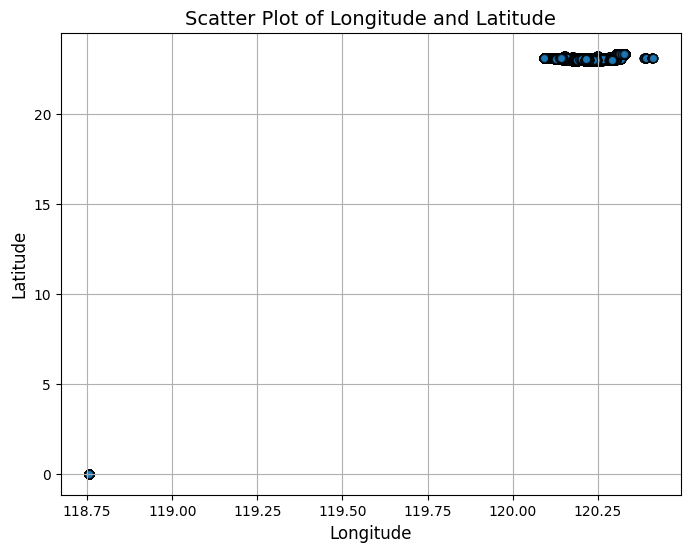

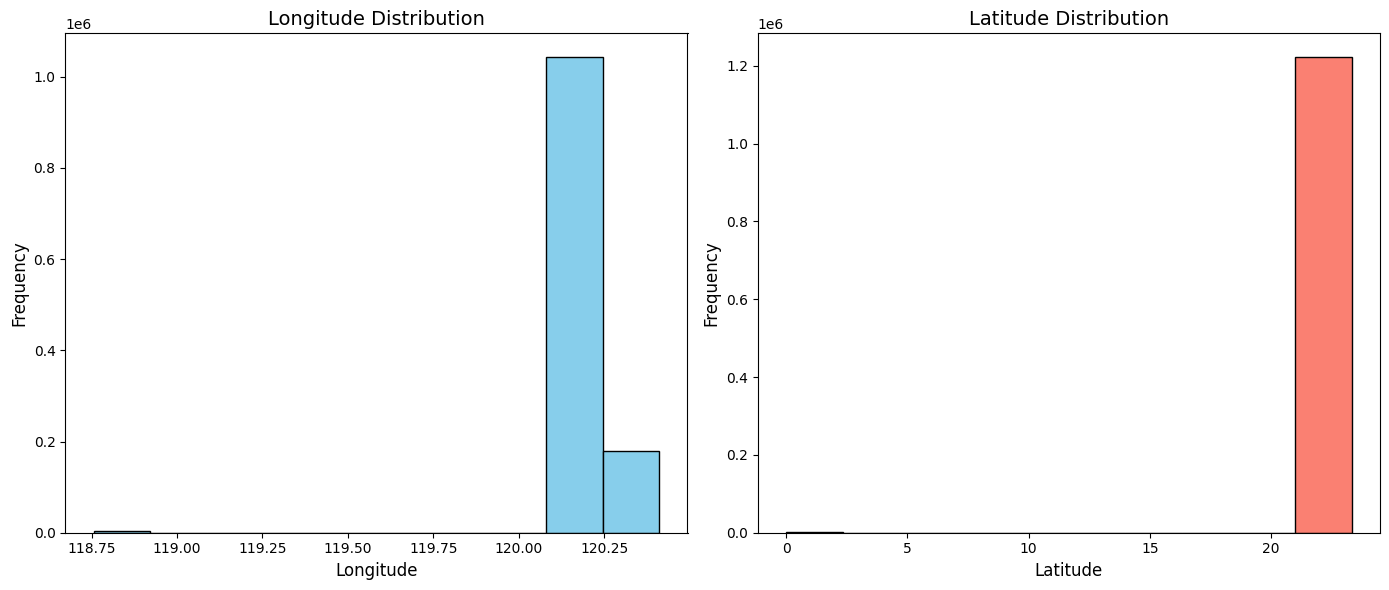

In [71]:
# Scatter Plot of Longitude and Latitude
plt.figure(figsize=(8, 6))
plt.scatter(ovitrap['lon'], ovitrap['lat'], alpha=0.7, edgecolors='k')
plt.title('Scatter Plot of Longitude and Latitude', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True)
plt.show()

# Histograms for Longitude and Latitude
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Longitude histogram
axes[0].hist(ovitrap['lon'], bins=10, color='skyblue', edgecolor='black')
axes[0].set_title('Longitude Distribution', fontsize=14)
axes[0].set_xlabel('Longitude', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Latitude histogram
axes[1].hist(ovitrap['lat'], bins=10, color='salmon', edgecolor='black')
axes[1].set_title('Latitude Distribution', fontsize=14)
axes[1].set_xlabel('Latitude', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

# Cleaning the data: Removing outliers
valid_lon = ovitrap['lon'].between(120, 121)
valid_lat = ovitrap['lat'].between(20, 25)
cleaned_ovitrap = ovitrap[valid_lon & valid_lat]

invalid_lon = ~ovitrap['lon'].between(120, 121)
invalid_lat = ~ovitrap['lat'].between(20, 25)

# Outliers DataFrame
outliers = ovitrap[invalid_lon | invalid_lat]

# Error comes from XY being directly longtitude and latitude


In [72]:
# Correction for Outliers Data -> Use XY as lon-lat directly
outliers['lon'] = outliers['X']
outliers['lat'] = outliers['Y']

cleaned_ovitrap = pd.concat([cleaned_ovitrap, outliers])

C:\Users\Patrick\AppData\Local\Temp\ipykernel_35708\426182415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['lon'] = outliers['X']
C:\Users\Patrick\AppData\Local\Temp\ipykernel_35708\426182415.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['lat'] = outliers['Y']


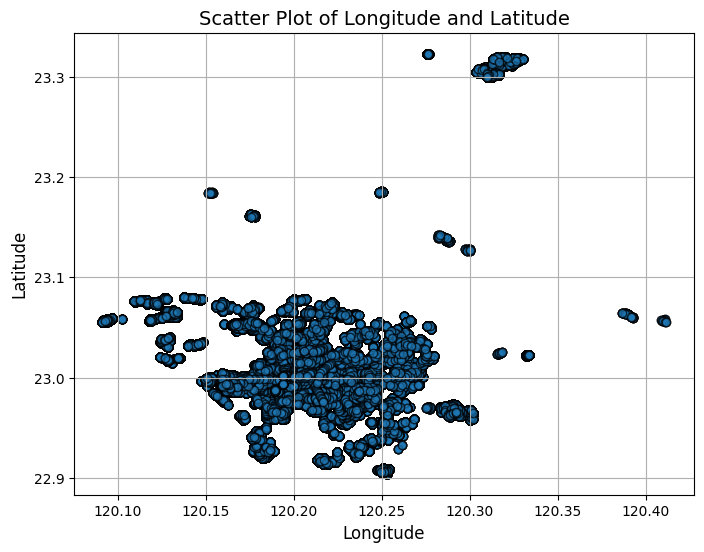

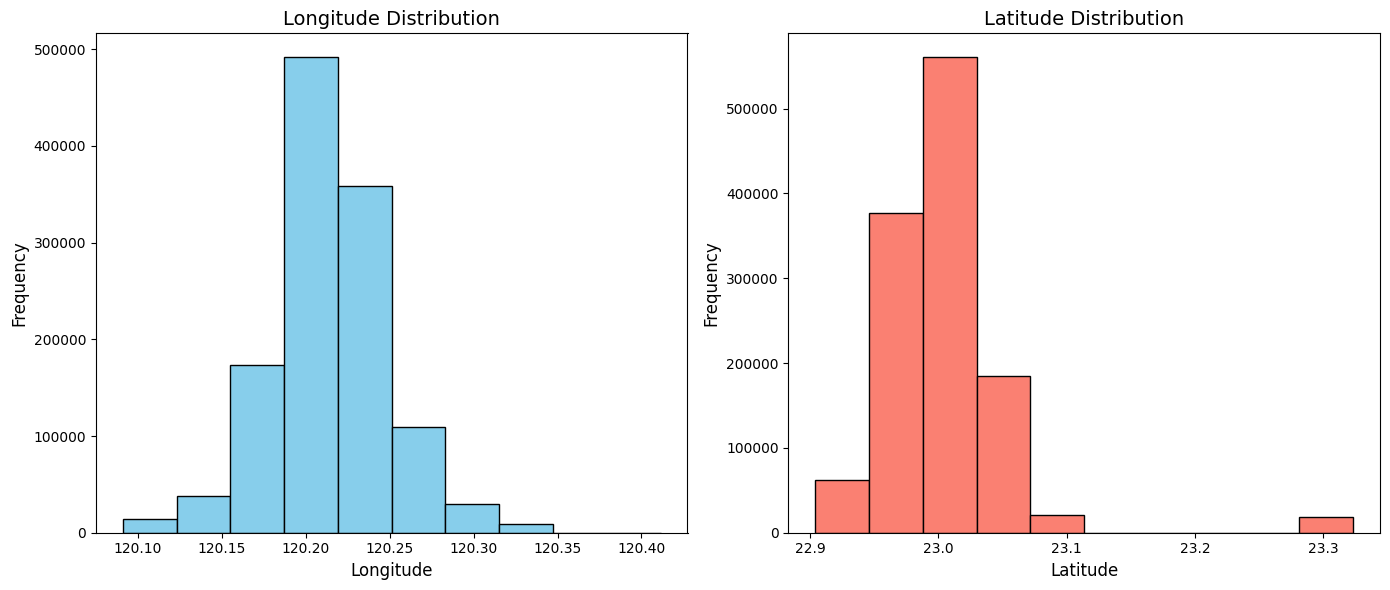

In [73]:
# Scatter Plot of Longitude and Latitude
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_ovitrap['lon'], cleaned_ovitrap['lat'], alpha=0.7, edgecolors='k')
plt.title('Scatter Plot of Longitude and Latitude', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True)
plt.show()

# Histograms for Longitude and Latitude
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Longitude histogram
axes[0].hist(cleaned_ovitrap['lon'], bins=10, color='skyblue', edgecolor='black')
axes[0].set_title('Longitude Distribution', fontsize=14)
axes[0].set_xlabel('Longitude', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Latitude histogram
axes[1].hist(cleaned_ovitrap['lat'], bins=10, color='salmon', edgecolor='black')
axes[1].set_title('Latitude Distribution', fontsize=14)
axes[1].set_xlabel('Latitude', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

In [76]:
cleaned_ovitrap['Year'] = pd.to_datetime(cleaned_ovitrap['StartTime']).dt.year
ovitrap_2023 = cleaned_ovitrap[cleaned_ovitrap['Year']==2023].reset_index(drop=True)

In [137]:
ovitrap_gdf = gpd.GeoDataFrame(
    ovitrap_2023, 
    geometry=gpd.points_from_xy(ovitrap_2023['lon'], ovitrap_2023['lat']),
    crs="EPSG:4326"  # Assuming WGS84; change if needed
)
# Load the polygons shapefile
tn_bsa_gdf = tn_bsa_shp.copy()

# Spatial join: add polygon info to each ovitrap point
joined = gpd.sjoin(ovitrap_gdf, tn_bsa_gdf, how="inner", predicate="within")

# Group by polygon index and calculate mean eggs count
mean_eggs = joined.groupby(joined.index_right)['AvgEggs'].mean()

# Create a new column in shapefile and fill it with mean egg counts
tn_bsa_gdf['Y2023_Ovitrap'] = tn_bsa_gdf.index.map(mean_eggs)

# Optional: fill NaNs with 0 or any default if some polygons have no traps
tn_bsa_gdf['Y2023_Ovitrap'] = tn_bsa_gdf['Y2023_Ovitrap'].fillna(0)

In [144]:
tn_bsa_gdf.to_file("tn_bsa_dengue_ovitrap.geojson", driver='GeoJSON')

In [119]:
# Step 1: Count infections per region code
infection_counts = local_tn_Dengue_2015['最小統計區'].value_counts().reset_index()
infection_counts.columns = ['region_code', 'dengue_count']

# Step 2: Merge counts with shapefile dataframe
# Ensure both codes are strings for a proper match
tn_bsa_shp['CODEBASE'] = tn_bsa_shp['CODEBASE'].astype(str)
infection_counts['region_code'] = infection_counts['region_code'].astype(str)

# Left join shapefile with counts
tn_bsa_shp = tn_bsa_shp.merge(
    infection_counts,
    how='left',
    left_on='CODEBASE',
    right_on='region_code'
)

# Step 3: Fill NaN (regions with no cases) with 0 and store in new column
tn_bsa_shp['dengue_2015'] = tn_bsa_shp['dengue_count'].fillna(0).astype(int)

In [ ]:
tn_bsa_shp.to_file('tn_bsa_shp_age_pop_dengue_ovitrap.csv')

,U_ID,CODEBASE,CODE1,CODE2,TOWN_ID,TOWN,COUNTY_ID,COUNTY,X,Y,AREA,geometry,Y2023_A0A9_CNT,Y2023_A0A9_M_CNT,Y2023_A0A9_F_CNT,Y2023_A10A19_CNT,Y2023_A10A19_M_CNT,Y2023_A10A19_F_CNT,Y2023_A20A29_CNT,Y2023_A20A29_M_CNT,Y2023_A20A29_F_CNT,Y2023_A30A39_CNT,Y2023_A30A39_M_CNT,Y2023_A30A39_F_CNT,Y2023_A40A49_CNT,Y2023_A40A49_M_CNT,Y2023_A40A49_F_CNT,Y2023_A50A59_CNT,Y2023_A50A59_M_CNT,Y2023_A50A59_F_CNT,Y2023_A60A69_CNT,Y2023_A60A69_M_CNT,Y2023_A60A69_F_CNT,Y2023_A70A79_CNT,Y2023_A70A79_M_CNT,Y2023_A70A79_F_CNT,Y2023_A80A89_CNT,Y2023_A80A89_M_CNT,Y2023_A80A89_F_CNT,Y2023_A90A99_CNT,Y2023_A90A99_M_CNT,Y2023_A90A99_F_CNT,Y2023_A100UP_10_CNT,Y2023_A100UP_M_10_CNT,Y2023_A100UP_F_10_CNT,Y2015_A0A9_CNT,Y2015_A0A9_M_CNT,Y2015_A0A9_F_CNT,Y2015_A10A19_CNT,Y2015_A10A19_M_CNT,Y2015_A10A19_F_CNT,Y2015_A20A29_CNT,Y2015_A20A29_M_CNT,Y2015_A20A29_F_CNT,Y2015_A30A39_CNT,Y2015_A30A39_M_CNT,Y2015_A30A39_F_CNT,Y2015_A40A49_CNT,Y2015_A40A49_M_CNT,Y2015_A40A49_F_CNT,Y2015_A50A59_CNT,Y2015_A50A59_M_CNT,Y2015_A50A59_F_CNT,Y2015_A60A69_CNT,Y2015_A60A69_M_CNT,Y2015_A60A69_F_CNT,Y2015_A70A79_CNT,Y2015_A70A79_M_CNT,Y2015_A70A79_F_CNT,Y2015_A80A89_CNT,Y2015_A80A89_M_CNT,Y2015_A80A89_F_CNT,Y2015_A90A99_CNT,Y2015_A90A99_M_CNT,Y2015_A90A99_F_CNT,Y2015_A100UP_10_CNT,Y2015_A100UP_M_10_CNT,Y2015_A100UP_F_10_CNT,Y2023_H_CNT,Y2023_P_CNT,Y2023_M_CNT,Y2023_F_CNT,Y2015_H_CNT,Y2015_P_CNT,Y2015_M_CNT,Y2015_F_CNT
0,1519,A6713-0044-00,A6713-03-004,A6713-03,67000130,學甲區,67000,臺南市,167095.16348,2.573509e+06,2.409279e+06,"POLYGON Z ((120.17383 23.2717 0, 120.17414 23....",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
1,1520,A6706-0169-00,A6706-10-004,A6706-10,67000060,東山區,67000,臺南市,195790.88048,2.574560e+06,1.871302e+05,"POLYGON Z ((120.46841 23.27525 0, 120.46847 23...",0,0,0,5,3,2,8,4,4,7,4,3,5,3,2,9,5,4,5,2,3,2,2,0,4,2,2,0,0,0,0,0,0,3,2,1,4,2,2,9,5,4,3,3,0,8,3,5,9,5,4,1,1,0,6,4,2,1,0,1,0,0,0,0,0,0,13,45,25,20,12,44,25,19
2,1521,A6704-0124-00,A6704-07-007,A6704-07,67000040,柳營區,67000,臺南市,178154.64243,2.574746e+06,5.917852e+04,"POLYGON Z ((120.29947 23.27444 0, 120.29947 23...",8,5,3,7,6,1,22,13,9,33,18,15,27,14,13,29,14,15,24,15,9,18,9,9,17,8,9,1,1,0,1,0,1,5,2,3,14,11,3,35,20,15,15,8,7,24,8,16,32,24,8,24,12,12,25,12,13,6,2,4,3,2,1,0,0,0,80,187,103,84,74,183,101,82
3,1522,A6701-0425-00,A6701-27-006,A6701-27,67000010,新營區,67000,臺南市,175860.08597,2.574747e+06,2.694759e+04,"POLYGON Z ((120.27531 23.27419 0, 120.27567 23...",6,1,5,8,6,2,20,15,5,18,12,6,12,5,7,22,11,11,14,8,6,8,4,4,6,4,2,0,0,0,0,0,0,4,1,3,17,10,7,15,10,5,9,6,3,21,8,13,19,12,7,8,7,1,11,5,6,9,3,6,1,0,1,0,0,0,51,114,66,48,46,114,62,52
4,1593,A6706-0182-00,A6706-10-005,A6706-10,67000060,東山區,67000,臺南市,195370.86654,2.573953e+06,1.849167e+05,"POLYGON Z ((120.4688 23.26962 0, 120.46887 23....",1,0,1,2,1,1,4,2,2,9,4,5,7,4,3,10,7,3,6,3,3,8,4,4,3,0,3,0,0,0,0,0,0,6,5,1,6,3,3,9,2,7,12,8,4,6,3,3,11,6,5,8,5,3,9,4,5,1,0,1,2,0,2,0,0,0,20,50,25,25,22,70,36,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12769,3108,A6710-0138-00,A6710-07-004,A6710-07,67000100,官田區,67000,臺南市,179864.54916,2.564638e+06,4.500631e+05,"POLYGON Z ((120.31738 23.1852 0, 120.31813 23....",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
12770,3109,A6707-0157-00,A6707-05-006,A6707-05,67000070,麻豆區,67000,臺南市,173376.00015,2.564946e+06,1.006336e+04,"POLYGON Z ((120.25085 23.18521 0, 120.25103 23...",7,3,4,19,6,13,9,5,4,11,8,3,24,16

In [28]:
import os
import pandas as pd
from pathlib import Path

# Set the base directory
base_dir = RAW_DIR / "TW_DENGUE"

# Create dictionaries to store the data
pop_data = {}
demo_data = {}

# Walk through the directory to find all CSV files
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".csv"):
            file_path = os.path.join(root, file)

            # Check if it's population or demographic based on the path
            if "BSA_population_TN" in file_path:
                data_dict = pop_data
                prefix = "pop"
            elif "BSA_demographic_TN" in file_path:
                data_dict = demo_data
                prefix = "demo"
            else:
                continue  # Skip files not in the desired folders

            try:
                # Extract the first number before '年'
                number = int(''.join(filter(str.isdigit, file.split("年")[0])))
                year = number + 1911
            except Exception as e:
                print(f"Failed to extract year from {file}: {e}")
                continue

            # Attempt to read the file with both encodings
            for encoding in ["utf-8", "big5"]:
                try:
                    df = pd.read_csv(file_path, encoding=encoding)
                    data_dict[year] = df
                    print(f"Loaded {file} ({prefix}_{year}) using {encoding}.")
                    break
                except Exception as e:
                    print(f"Failed to read {file} with {encoding}: {e}")


Failed to read 102年12月臺南市統計區人口指標_最小統計區.csv with utf-8: 'utf-8' codec can't decode byte 0xa4 in position 0: invalid start byte
Loaded 102年12月臺南市統計區人口指標_最小統計區.csv (demo_2013) using big5.
Failed to read 103年6月臺南市統計區人口指標_最小統計區.csv with utf-8: 'utf-8' codec can't decode byte 0xa4 in position 0: invalid start byte
Loaded 103年6月臺南市統計區人口指標_最小統計區.csv (demo_2014) using big5.
Failed to read 105年6月臺南市統計區人口指標_最小統計區.csv with utf-8: 'utf-8' codec can't decode byte 0xa4 in position 0: invalid start byte
Loaded 105年6月臺南市統計區人口指標_最小統計區.csv (demo_2016) using big5.
Failed to read 106年12月臺南市統計區人口指標_最小統計區.csv with utf-8: 'utf-8' codec can't decode byte 0xa4 in position 0: invalid start byte
Loaded 106年12月臺南市統計區人口指標_最小統計區.csv (demo_2017) using big5.
Failed to read 107年12月臺南市統計區人口指標_最小統計區.csv with utf-8: 'utf-8' codec can't decode byte 0xa4 in position 0: invalid start byte
Loaded 107年12月臺南市統計區人口指標_最小統計區.csv (demo_2018) using big5.
Failed to read 108年6月臺南市統計區人口指標_最小統計區.csv with utf-8: 'utf-8' codec can't decod

In [ ]:
'''Import CSV Files of Basic Statistics Area and their Population'''

# Directory containing the nested folders
pop_dir = RAW_DIR / "TW_DENGUE" / "BSA_population_TN"
demo_dir = RAW_DIR / "TW_DENGUE" / "BSA_demographic_TN"

# Walk through the directory to find all CSV files
for root, dirs, files in os.walk(pop_dir):
    for file in files:
        if file.endswith(".csv"):
            # Extract the first number from the filename
            number = int(''.join(filter(str.isdigit, file.split("年")[0])))  # Get the number before '年'
            year = number + 1911  # Add 1911
            
            # Full path to the CSV file
            file_path = os.path.join(root, file)
            
            # Attempt to load the CSV file with both encodings
            for encoding in ["utf-8", "big5"]:
                try:
                    df_name = f"pop_{year}"
                    globals()[df_name] = pd.read_csv(file_path, encoding=encoding)
                    print(f"Successfully loaded {file} as {df_name} using {encoding} encoding.")
                    break  # Exit the loop if successfully loaded
                except Exception as e:
                    print(f"Failed to load {file} with {encoding} encoding. Error: {e}")

# Walk through the directory to find all CSV files
for root, dirs, files in os.walk(demo_dir):
    for file in files:
        if file.endswith(".csv"):
            # Extract the first number from the filename
            number = int(''.join(filter(str.isdigit, file.split("年")[0])))  # Get the number before '年'
            year = number + 1911  # Add 1911
            
            # Full path to the CSV file
            file_path = os.path.join(root, file)
            
            # Attempt to load the CSV file with both encodings
            for encoding in ["utf-8", "big5"]:
                try:
                    df_name = f"demo_{year}"
                    globals()[df_name] = pd.read_csv(file_path, encoding=encoding)
                    print(f"Successfully loaded {file} as {df_name} using {encoding} encoding.")
                    break  # Exit the loop if successfully loaded
                except Exception as e:
                    print(f"Failed to load {file} with {encoding} encoding. Error: {e}")

Failed to load 104年12月臺南市統計區人口統計_最小統計區.csv with utf-8 encoding. Error: 'utf-8' codec can't decode byte 0xa4 in position 0: invalid start byte
Successfully loaded 104年12月臺南市統計區人口統計_最小統計區.csv as pop_2015 using big5 encoding.
Failed to load 105年12月臺南市統計區人口統計_最小統計區.csv with utf-8 encoding. Error: 'utf-8' codec can't decode byte 0xa4 in position 0: invalid start byte
Successfully loaded 105年12月臺南市統計區人口統計_最小統計區.csv as pop_2016 using big5 encoding.
Successfully loaded 106年12月臺南市統計區人口統計_最小統計區.csv as pop_2017 using utf-8 encoding.
Failed to load 107年12月臺南市統計區人口統計_最小統計區.csv with utf-8 encoding. Error: 'utf-8' codec can't decode byte 0xa4 in position 0: invalid start byte
Successfully loaded 107年12月臺南市統計區人口統計_最小統計區.csv as pop_2018 using big5 encoding.
Failed to load 108年12月臺南市統計區人口統計_最小統計區.csv with utf-8 encoding. Error: 'utf-8' codec can't decode byte 0xa4 in position 0: invalid start byte
Successfully loaded 108年12月臺南市統計區人口統計_最小統計區.csv as pop_2019 using big5 encoding.
Failed to load 109年12月臺南市統

In [7]:
village_pop_2015 = pd.read_csv(r"C:\Users\Patrick\Downloads\STAT (4)\104年12月行政區人口統計_村里_臺南市\104年12月行政區人口統計_村里_臺南市.csv")
village_pop_2023 = pd.read_csv(r"C:\Users\Patrick\Downloads\STAT (4)\112年12月行政區人口統計_村里_臺南市\112年12月行政區人口統計_村里_臺南市.csv")

In [11]:
pop_2015

,CODE2,CODE1,CODEBASE,H_CNT,P_CNT,M_CNT,F_CNT,INFO_TIME
0,二級發布區代碼,一級發布區代碼,最小統計區代碼,戶數,人口數,男性人口數,女性人口數,資料時間
1,A6701-01,A6701-01-001,A6701-0005-00,34,100,54,46,104Y12M
2,A6701-01,A6701-01-001,A6701-0012-00,65,168,87,81,104Y12M
3,A6701-01,A6701-01-002,A6701-0004-00,55,148,76,72,104Y12M
4,A6701-01,A6701-01-002,A6701-0009-00,59,163,90,73,104Y12M
...,...,...,...,...,...,...,...,...
11865,A6737-27,A6737-27-007,A6737-0516-00,39,120,53,67,104Y12M
11866,A6737-27,A6737-27-007,A6737-0517-00,29,66,27,39,104Y12M
11867,A6737-27,A6737-27-007,A6737-0518-00,37,81,31,50,104Y12M
11868,A6737-27,A6737-27-008,A6737-0511-00,76,196,83,113,104Y12M


In [22]:
tn_shp['CODE1'].nunique()

6322

,發病日,個案研判日,通報日,性別,年齡層,居住縣市,居住鄉鎮,居住村里,最小統計區,最小統計區中心點X,...,是否境外移入,感染國家,確定病例數,居住村里代碼,感染村里代碼,血清型,內政部居住縣市代碼,內政部居住鄉鎮代碼,內政部感染縣市代碼,內政部感染鄉鎮代碼
0,1998/01/02,NaN,1998/01/07,M,40-44,屏東縣,屏東市,NaN,A1320-0136-00,120.505899,...,否,NaN,1,NaN,NaN,NaN,10013.0,1001301.0,NaN,NaN
1,1998/01/15,NaN,1998/01/23,M,35-39,高雄市,苓雅區,NaN,A6408-0153-00,120.338159,...,否,NaN,1,NaN,NaN,NaN,64.0,6400800.0,NaN,NaN
2,1998/01/20,NaN,1998/02/04,M,55-59,宜蘭縣,五結鄉,NaN,A0209-0232-00,121.798235,...,否,NaN,1,NaN,NaN,NaN,10002.0,1000209.0,NaN,NaN
3,1998/01/23,NaN,1998/02/02,M,40-44,新北市,新店區,NaN,A6506-0178-00,121.547480,...,否,NaN,1,NaN,NaN,NaN,65.0,6500600.0,NaN,NaN
4,1998/01/26,NaN,1998/02/19,F,65-69,台北市,北投區,NaN,A6312-0203-00,121.500936,...,否,NaN,1,NaN,NaN,NaN,63.0,6301200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102291,2024/10/28,2024/11/06,2024/11/05,F,65-69,台北市,萬華區,柳鄉里,A6307-0185-00,121.496597,...,否,中華民國,1,6300700-019,NaN,第二型,63.0,6300700.0,NaN,NaN
102292,2024/10/31,2024/11/08,2024/11/07,M,45-49,台北市,大安區,龍圖里,A6303-0486-00,121.540954,...,否,NaN,1,6300300-022,NaN,第二型,63.0,6300300.0,NaN,NaN
102293,2024/11/04,2024/11/07,2024/11/07,F,65-69,新北市,中和區,崇南里,A6503-1476-00,121.513061,...,否,中華民國,1,6500300-039,NaN,第二型,65.0,6500300.0,NaN,NaN
102294,2024/11/05,2024/11/08,2024/11/07,M,55-59,新北市,永和區,協和里,A6504-0502-00,121.511861,...,否,中華民國,1,6500400-027,NaN,第二型,65.0,6500400.0,NaN,NaN


In [23]:
tn_shp

,U_ID,CODEBASE,CODE1,CODE2,TOWN_ID,TOWN,COUNTY_ID,COUNTY,X,Y,AREA,geometry
0,1519,A6713-0044-00,A6713-03-004,A6713-03,67000130,學甲區,67000,臺南市,167095.16348,2.573509e+06,2.409279e+06,"POLYGON Z ((120.17383 23.2717 0, 120.17414 23...."
1,1520,A6706-0169-00,A6706-10-004,A6706-10,67000060,東山區,67000,臺南市,195790.88048,2.574560e+06,1.871302e+05,"POLYGON Z ((120.46841 23.27525 0, 120.46847 23..."
2,1521,A6704-0124-00,A6704-07-007,A6704-07,67000040,柳營區,67000,臺南市,178154.64243,2.574746e+06,5.917852e+04,"POLYGON Z ((120.29947 23.27444 0, 120.29947 23..."
3,1522,A6701-0425-00,A6701-27-006,A6701-27,67000010,新營區,67000,臺南市,175860.08597,2.574747e+06,2.694759e+04,"POLYGON Z ((120.27531 23.27419 0, 120.27567 23..."
4,1593,A6706-0182-00,A6706-10-005,A6706-10,67000060,東山區,67000,臺南市,195370.86654,2.573953e+06,1.849167e+05,"POLYGON Z ((120.4688 23.26962 0, 120.46887 23...."
...,...,...,...,...,...,...,...,...,...,...,...,...
12769,3108,A6710-0138-00,A6710-07-004,A6710-07,67000100,官田區,67000,臺南市,179864.54916,2.564638e+06,4.500631e+05,"POLYGON Z ((120.31738 23.1852 0, 120.31813 23...."
12770,3109,A6707-0157-00,A6707-05-006,A6707-05,67000070,麻豆區,67000,臺南市,173376.00015,2.564946e+06,1.006336e+04,"POLYGON Z ((120.25085 23.18521 0, 120.25103 23..."
12771,3110,A6707-0163-00,A6707-05-007,A6707-05,67000070,麻豆區,67000,臺南市,173493.29866,2.564901e+06,2.001176e+04,"POLYGON Z ((120.2524 23.18523 0, 120.25242 23...."
12772,3111,A6707-0164-00,A6707-05-008,A6707-05,67000070,麻豆區,67000,臺南市,173594.45705,2.564904e+06,1.244706e+04,"POLYGON Z ((120.25325 23.18522 0, 120.25395 23..."


In [21]:
village_pop_2015['V_ID'].nunique()

753

In [24]:
village_pop_2015

,COUNTY_ID,COUNTY,TOWN_ID,TOWN,V_ID,VILLAGE,H_CNT,P_CNT,M_CNT,F_CNT,INFO_TIME
0,縣市代碼,縣市名稱,鄉鎮市區代碼,鄉鎮市區名稱,村里代碼,村里名稱,戶數,人口數,男性人口數,女性人口數,資料時間
1,67000,臺南市,67000150,七股區,67000150-010,七股里,332,1104,571,533,104Y12M
2,67000,臺南市,67000150,七股區,67000150-023,十份里,524,1602,854,748,104Y12M
3,67000,臺南市,67000150,七股區,67000150-022,三股里,488,1609,844,765,104Y12M
4,67000,臺南市,67000150,七股區,67000150-012,大埕里,682,2057,1022,1035,104Y12M
...,...,...,...,...,...,...,...,...,...,...,...
748,67000,臺南市,67000020,鹽水區,67000020-012,義稠里,367,985,503,482,104Y12M
749,67000,臺南市,67000020,鹽水區,67000020-002,福得里,299,760,400,360,104Y12M
750,67000,臺南市,67000020,鹽水區,67000020-008,橋南里,1632,4354,2181,2173,104Y12M
751,67000,臺南市,67000020,鹽水區,67000020-009,舊營里,352,932,502,430,104Y12M


In [17]:
import pandas as pd



def calculate_populations(merged_df):
    """Calculates missing M_CNT and F_CNT values using P_CNT and M_F_RAT."""
    
    # Convert 'M_F_RAT' to a usable ratio (assuming it's currently a percentage)
    merged_df['M_F_RAT'] = merged_df['M_F_RAT'] / 100

    # Calculate missing 'M_CNT'
    merged_df['calculated_M_CNT'] = 0
    merged_df.loc[merged_df['M_CNT'] == 0, 'calculated_M_CNT'] = merged_df.loc[merged_df['M_CNT'] == 0, 'P_CNT'] / (1 + 1 / merged_df.loc[merged_df['M_CNT'] == 0, 'M_F_RAT'])
    merged_df.loc[merged_df['M_CNT'] != 0, 'calculated_M_CNT'] = merged_df.loc[merged_df['M_CNT'] != 0, 'M_CNT']

    # Calculate missing 'F_CNT'
    merged_df['calculated_F_CNT'] = 0
    merged_df.loc[merged_df['F_CNT'] == 0, 'calculated_F_CNT'] = merged_df.loc[merged_df['F_CNT'] == 0, 'P_CNT'] / (1 + merged_df.loc[merged_df['F_CNT'] == 0, 'M_F_RAT'])
    merged_df.loc[merged_df['F_CNT'] != 0, 'calculated_F_CNT'] = merged_df.loc[merged_df['F_CNT'] != 0, 'F_CNT']
    
    return merged_df


def calculate_ratio(merged_df):
    """Calculates the male-to-female ratio and handles infinite values."""
    
    # Calculate the male-to-female ratio
    merged_df['M_F_ratio'] = 0
    merged_df.loc[merged_df['calculated_F_CNT'] != 0, 'M_F_ratio'] = merged_df.loc[merged_df['calculated_F_CNT'] != 0, 'calculated_M_CNT'] / merged_df.loc[merged_df['calculated_F_CNT'] != 0, 'calculated_F_CNT']
    merged_df.loc[merged_df['calculated_F_CNT'] == 0, 'M_F_ratio'] = float('inf')
    
    # Replace infinite values with a large finite number
    merged_df['M_F_ratio'].replace(float('inf'), 100, inplace=True)
    
    return merged_df


def create_result_df(merged_df):
    """Creates the final result dataframe with specified columns."""
    
    if '統計區ID' not in merged_df.columns:
        if 'CODE2' in merged_df.columns:
            merged_df.rename(columns={'CODE2': '統計區ID'}, inplace=True)
        else:
            print("Error: '統計區ID' or a suitable alternative identifier column not found.")
            # Handle the error appropriately
            
    required_columns = ['統計區ID', 'calculated_M_CNT', 'calculated_F_CNT', 'M_F_ratio', 'M_CNT', 'F_CNT']
    existing_columns = [col for col in required_columns if col in merged_df.columns]

    if len(existing_columns) != len(required_columns):
        print("Error: Not all required columns are present in merged_df.")
        # Handle the error appropriately

    result_df = merged_df[existing_columns].copy()
    
    return result_df


def process_data(population_df, indicator_df):
    """Processes data for a given year."""
    
    # Remove the first row (header row)
    population_df = population_df.iloc[1:]
    indicator_df = indicator_df.iloc[1:]

    # Convert relevant columns to numeric types using .loc
    for col in ['M_CNT', 'F_CNT', 'P_CNT']:
        population_df.loc[:, col] = pd.to_numeric(population_df.loc[:, col], errors='coerce')
    indicator_df.loc[:, 'M_F_RAT'] = pd.to_numeric(indicator_df.loc[:, 'M_F_RAT'], errors='coerce')
    merged_df = pd.merge(population_df, indicator_df, on=['CODE2', 'CODE1', 'CODEBASE'], how='outer')
    
    # Fill missing numerical values with 0 temporarily
    for col in ['M_CNT', 'F_CNT', 'P_CNT', 'M_F_RAT']:
        merged_df[col] = merged_df[col].fillna(0)
        
    merged_df = calculate_populations(merged_df)
    merged_df = calculate_ratio(merged_df)
    result_df = create_result_df(merged_df)
    
    return result_df

In [19]:
for year in range(2015, 2024):
    pop_df = globals()[f"pop_{year}"]
    demo_df = globals()[f"demo_{year}"]
    
    result_df = process_data(pop_df, demo_df)
    result_df.to_csv(f"calculated_MFratio_{year}.csv", index=False)

C:\Users\Patrick\AppData\Local\Temp\ipykernel_20804\3382482858.py:75: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df[col] = merged_df[col].fillna(0)
C:\Users\Patrick\AppData\Local\Temp\ipykernel_20804\3382482858.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.17391304 1.07407407 1.05555556 ... 0.62       0.73451327 0.93442623]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged_df.loc[merged_df['calculated_F_CNT'] != 0, 'M_F_ratio'] = merged_df.loc[merged_df['calculated_F_CNT'] != 0, 'calculated_M_CNT'] / merged_df.loc[merged_df['calculated_F_CNT'] != 0, 'calculated_F_CNT']
C:\Users\Patrick\AppData\Local\Temp\ipykernel_20804\33

In [12]:
'''Cleaning up data from BSA population and dengue incidence data'''
# Convert all dates in Dengue Data to Datetime Object
dengue_local['發病日'] = pd.to_datetime(dengue_local['發病日'], format='%Y/%m/%d')
dengue_local['Year'] = dengue_local['發病日'].dt.year


In [13]:
tn_shp = gpd.read_file('C:/Users/Patrick/Downloads/0-67000/G97_67000_U0200_2015.shp')

In [15]:
village_pop_2015

,COUNTY_ID,COUNTY,TOWN_ID,TOWN,V_ID,VILLAGE,H_CNT,P_CNT,M_CNT,F_CNT,INFO_TIME
0,縣市代碼,縣市名稱,鄉鎮市區代碼,鄉鎮市區名稱,村里代碼,村里名稱,戶數,人口數,男性人口數,女性人口數,資料時間
1,67000,臺南市,67000150,七股區,67000150-010,七股里,332,1104,571,533,104Y12M
2,67000,臺南市,67000150,七股區,67000150-023,十份里,524,1602,854,748,104Y12M
3,67000,臺南市,67000150,七股區,67000150-022,三股里,488,1609,844,765,104Y12M
4,67000,臺南市,67000150,七股區,67000150-012,大埕里,682,2057,1022,1035,104Y12M
...,...,...,...,...,...,...,...,...,...,...,...
748,67000,臺南市,67000020,鹽水區,67000020-012,義稠里,367,985,503,482,104Y12M
749,67000,臺南市,67000020,鹽水區,67000020-002,福得里,299,760,400,360,104Y12M
750,67000,臺南市,67000020,鹽水區,67000020-008,橋南里,1632,4354,2181,2173,104Y12M
751,67000,臺南市,67000020,鹽水區,67000020-009,舊營里,352,932,502,430,104Y12M


In [14]:
tn_shp

,U_ID,CODEBASE,CODE1,CODE2,TOWN_ID,TOWN,COUNTY_ID,COUNTY,X,Y,AREA,geometry
0,1519,A6713-0044-00,A6713-03-004,A6713-03,67000130,學甲區,67000,臺南市,167095.16348,2.573509e+06,2.409279e+06,"POLYGON Z ((165475.842 2574610.017 0, 165508.4..."
1,1520,A6706-0169-00,A6706-10-004,A6706-10,67000060,東山區,67000,臺南市,195790.88048,2.574560e+06,1.871302e+05,"POLYGON Z ((195616.399 2574862.158 0, 195621.9..."
2,1521,A6704-0124-00,A6704-07-007,A6704-07,67000040,柳營區,67000,臺南市,178154.64243,2.574746e+06,5.917852e+04,"POLYGON Z ((178332.24 2574846.32 0, 178332.055..."
3,1522,A6701-0425-00,A6701-27-006,A6701-27,67000010,新營區,67000,臺南市,175860.08597,2.574747e+06,2.694759e+04,"POLYGON Z ((175860.276 2574830.526 0, 175897.1..."
4,1593,A6706-0182-00,A6706-10-005,A6706-10,67000060,東山區,67000,臺南市,195370.86654,2.573953e+06,1.849167e+05,"POLYGON Z ((195653.609 2574238.612 0, 195660.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...
12769,3108,A6710-0138-00,A6710-07-004,A6710-07,67000100,官田區,67000,臺南市,179864.54916,2.564638e+06,4.500631e+05,"POLYGON Z ((180117.413 2564955.551 0, 180194.6..."
12770,3109,A6707-0157-00,A6707-05-006,A6707-05,67000070,麻豆區,67000,臺南市,173376.00015,2.564946e+06,1.006336e+04,"POLYGON Z ((173306.466 2564990.163 0, 173324.7..."
12771,3110,A6707-0163-00,A6707-05-007,A6707-05,67000070,麻豆區,67000,臺南市,173493.29866,2.564901e+06,2.001176e+04,"POLYGON Z ((173465.574 2564990.492 0, 173467.4..."
12772,3111,A6707-0164-00,A6707-05-008,A6707-05,67000070,麻豆區,67000,臺南市,173594.45705,2.564904e+06,1.244706e+04,"POLYGON Z ((173552.407 2564989.029 0, 173624.3..."


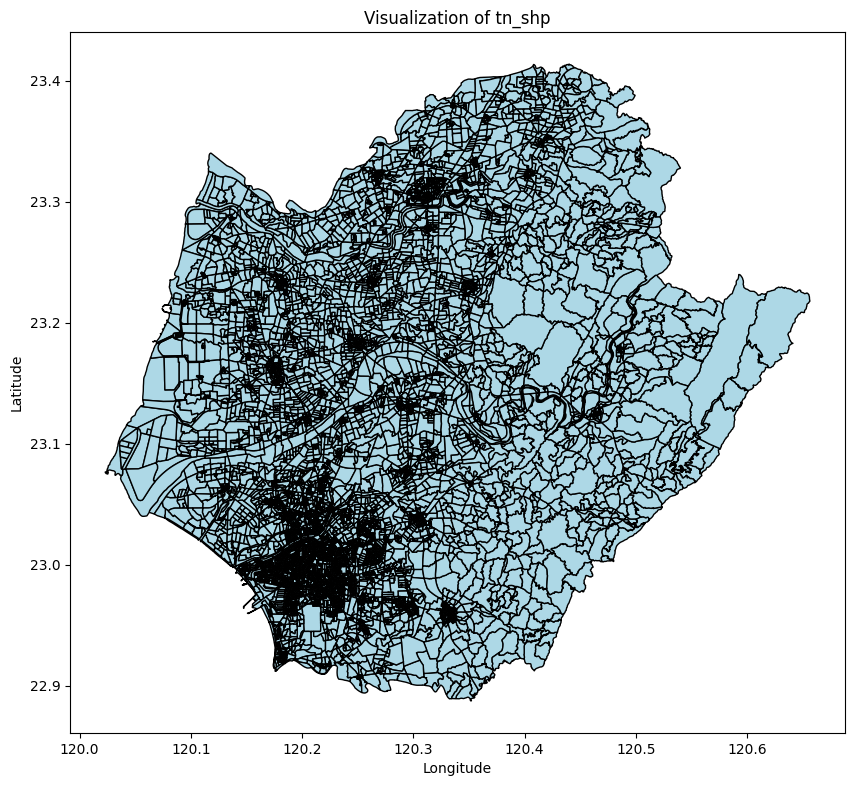

In [16]:
# Read in Tainan shapefile
tn_shp = gpd.read_file('C:/Users/Patrick/Downloads/0-67000/G97_67000_U0200_2015.shp')
tn_shp = tn_shp.to_crs(epsg=4326)
fig, ax = plt.subplots(figsize=(10, 10))
tn_shp.plot(ax=ax, color='lightblue', edgecolor='black')
plt.title("Visualization of tn_shp")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
# Define districts that are acccounted for
allowed_districts = ['東區', '安南區', '南區', '北區', '中西區', '安平區']
# Read in Taiwan shapefile
tn_shp = gpd.read_file('C:/Users/Patrick/Downloads/0-67000/G97_67000_U0200_2015.shp')
# Filter SHP file by Area
filtered_tn_shp = tn_shp[tn_shp['TOWN'].isin(allowed_districts)]
# Filter Dengue Cases by Tainan
tn_dengue = dengue_local[dengue_local['居住縣市']=='台南市'].reset_index(drop=True)
# Filter Tainan Dengue Cases by Area
filtered_tn_dengue = tn_dengue[
    (tn_dengue['居住鄉鎮'].isin(allowed_districts)) &
    (tn_dengue['Year'] >= 2015) &
    (tn_dengue['Year'] <= 2023) 
].reset_index(drop=True)
# Rename column of BSA Serial Number
filtered_tn_dengue = filtered_tn_dengue.rename(columns={"最小統計區":'CODEBASE'})


KeyError: 'Year'

In [10]:

# Read in Taiwan shapefile
tn_shp = gpd.read_file('C:/Users/Patrick/Downloads/0-67000/G97_67000_U0200_2015.shp')
# Filter Dengue Cases by Tainan
tn_dengue = dengue_local[dengue_local['居住縣市']=='台南市'].reset_index(drop=True)
# Filter Tainan Dengue Cases by Area
filtered_tn_dengue = tn_dengue[
    (tn_dengue['Year'] >= 2015) &
    (tn_dengue['Year'] <= 2023) 
].reset_index(drop=True)
# Rename column of BSA Serial Number
filtered_tn_dengue = filtered_tn_dengue.rename(columns={"最小統計區":'CODEBASE'})


Script to calculate incidence rate for the significant years.

In [7]:
# # Tallying dengue infections by year and CODEBASE
# dengue_2015 = filtered_tn_dengue[filtered_tn_dengue['Year'] == 2015].groupby('CODEBASE').size().reset_index(name='Infections_2015')
# dengue_2019 = filtered_tn_dengue[filtered_tn_dengue['Year'] == 2019].groupby('CODEBASE').size().reset_index(name='Infections_2019')
# dengue_2023 = filtered_tn_dengue[filtered_tn_dengue['Year'] == 2023].groupby('CODEBASE').size().reset_index(name='Infections_2023')

# # Merging population data with infection counts for each year
# df_2015_pop = df_2015[['CODEBASE', 'P_CNT']].rename(columns={'P_CNT': 'Population_2015'})
# df_2019_pop = df_2019[['CODEBASE', 'P_CNT']].rename(columns={'P_CNT': 'Population_2019'})
# df_2023_pop = df_2023[['CODEBASE', 'P_CNT']].rename(columns={'P_CNT': 'Population_2023'})

# # Merging infection data with population data for each year
# df_2015_incidence = pd.merge(dengue_2015, df_2015_pop, on='CODEBASE', how='left')
# df_2019_incidence = pd.merge(dengue_2019, df_2019_pop, on='CODEBASE', how='left')
# df_2023_incidence = pd.merge(dengue_2023, df_2023_pop, on='CODEBASE', how='left')


In [8]:
# # Ensure all infection and population columns are numeric
# df_2015_incidence['Infections_2015'] = pd.to_numeric(df_2015_incidence['Infections_2015'], errors='coerce')
# df_2015_incidence['Population_2015'] = pd.to_numeric(df_2015_incidence['Population_2015'], errors='coerce')

# df_2019_incidence['Infections_2019'] = pd.to_numeric(df_2019_incidence['Infections_2019'], errors='coerce')
# df_2019_incidence['Population_2019'] = pd.to_numeric(df_2019_incidence['Population_2019'], errors='coerce')

# df_2023_incidence['Infections_2023'] = pd.to_numeric(df_2023_incidence['Infections_2023'], errors='coerce')
# df_2023_incidence['Population_2023'] = pd.to_numeric(df_2023_incidence['Population_2023'], errors='coerce')

# # Now calculate the incidence rates
# df_2015_incidence['Incidence_Rate_2015'] = (df_2015_incidence['Infections_2015'] / df_2015_incidence['Population_2015']) * 1000
# df_2019_incidence['Incidence_Rate_2019'] = (df_2019_incidence['Infections_2019'] / df_2019_incidence['Population_2019']) * 1000
# df_2023_incidence['Incidence_Rate_2023'] = (df_2023_incidence['Infections_2023'] / df_2023_incidence['Population_2023']) * 1000

# import matplotlib.pyplot as plt

# # Set incidence rates over 1000 to 1100
# df_2015_incidence.loc[df_2015_incidence['Incidence_Rate_2015'] > 1000, 'Incidence_Rate_2015'] = 1100
# df_2019_incidence.loc[df_2019_incidence['Incidence_Rate_2019'] > 1000, 'Incidence_Rate_2019'] = 1100
# df_2023_incidence.loc[df_2023_incidence['Incidence_Rate_2023'] > 1000, 'Incidence_Rate_2023'] = 1100

# # Create histograms for incidence rate distribution
# plt.figure(figsize=(15, 5))

# # Histogram for 2015
# plt.subplot(1, 3, 1)
# plt.hist(df_2015_incidence['Incidence_Rate_2015'], bins=20, color='blue', edgecolor='black')
# plt.title('Incidence Rate Distribution - 2015')
# plt.xlabel('Incidence Rate')
# plt.ylabel('Frequency')

# # Histogram for 2019
# plt.subplot(1, 3, 2)
# plt.hist(df_2019_incidence['Incidence_Rate_2019'], bins=20, color='green', edgecolor='black')
# plt.title('Incidence Rate Distribution - 2019')
# plt.xlabel('Incidence Rate')

# # Histogram for 2023
# plt.subplot(1, 3, 3)
# plt.hist(df_2023_incidence['Incidence_Rate_2023'], bins=20, color='red', edgecolor='black')
# plt.title('Incidence Rate Distribution - 2023')
# plt.xlabel('Incidence Rate')

# # Show the plots
# plt.tight_layout()
# plt.show()

In [8]:
years = [2015,2023]

# Loop through each year to calculate infections, population, and incidence rates
for year in years:
    # Tally infections by CODEBASE
    dengue_year = filtered_tn_dengue[filtered_tn_dengue['Year'] == year]
    infections = dengue_year.groupby('CODEBASE').size().reset_index(name=f'Inf_{year}')
    
    # Get population data
    population = eval(f"df_{year}[['CODEBASE', 'P_CNT', 'M_CNT', 'F_CNT']]").rename(columns={'P_CNT': f'Pop_{year}','M_CNT':f'M_{year}','F_CNT':f'F_{year}'})
    
    # Merge infection and population data
    incidence = pd.merge(infections, population, on='CODEBASE', how='left')
    
    # Ensure columns are numeric
    incidence[f'Inf_{year}'] = pd.to_numeric(incidence[f'Inf_{year}'], errors='coerce')
    incidence[f'Pop_{year}'] = pd.to_numeric(incidence[f'Pop_{year}'], errors='coerce')
    
    # Calculate incidence rate
    incidence[f'IR_{year}'] = (incidence[f'Inf_{year}'] / incidence[f'Pop_{year}']) * 1000
    
    # Merge infection count, population, and incidence rate data into the main shapefile DataFrame
    filtered_tn_dengue = pd.merge(tn_shp, incidence[['CODEBASE', f'Inf_{year}', f'Pop_{year}', f'IR_{year}',f'M_{year}', f'F_{year}']], on='CODEBASE', how='left')

# Now filtered_tn_shp contains infections, population, and incidence rates from 2015 to 2023 for all CODEBASEs


KeyError: 'Year'

In [12]:
years = [2015, 2023]
all_data = tn_shp.copy()

# Loop through each year to calculate infections, population, and incidence rates
for year in years:
    # Tally infections by CODEBASE for the current year
    dengue_year = filtered_tn_dengue[filtered_tn_dengue['Year'] == year]
    infections = dengue_year.groupby('CODEBASE').size().reset_index(name=f'Inf_{year}')
    
    # Get population data using eval
    population = eval(f"df_{year}[['CODEBASE', 'P_CNT', 'M_CNT', 'F_CNT']]").rename(
        columns={'P_CNT': f'Pop_{year}', 'M_CNT': f'M_{year}', 'F_CNT': f'F_{year}'}
    )
    
    # Merge infection and population data
    incidence = pd.merge(infections, population, on='CODEBASE', how='left')
    
    # Ensure numeric columns (convert errors to NaN and fill with 0)
    incidence[f'Inf_{year}'] = pd.to_numeric(incidence[f'Inf_{year}'], errors='coerce').fillna(0)
    incidence[f'Pop_{year}'] = pd.to_numeric(incidence[f'Pop_{year}'], errors='coerce').fillna(0)
    
    # Calculate incidence rate per 1000 people
    incidence[f'IR_{year}'] = (incidence[f'Inf_{year}'] / incidence[f'Pop_{year}']) * 1000
    
    # Merge results into the main DataFrame, keeping data for all years
    all_data = pd.merge(
        all_data,
        incidence[['CODEBASE', f'Inf_{year}', f'Pop_{year}', f'IR_{year}', f'M_{year}', f'F_{year}']],
        on='CODEBASE',
        how='left'
    )

# Now, all_data contains infections, population, and incidence rates from 2015 to 2


In [15]:
all_data

,U_ID,CODEBASE,CODE1,CODE2,TOWN_ID,TOWN,COUNTY_ID,COUNTY,X,Y,...,Inf_2015,Pop_2015,IR_2015,M_2015,F_2015,Inf_2023,Pop_2023,IR_2023,M_2023,F_2023
0,1519,A6713-0044-00,A6713-03-004,A6713-03,67000130,學甲區,67000,臺南市,167095.16348,2.573509e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1520,A6706-0169-00,A6706-10-004,A6706-10,67000060,東山區,67000,臺南市,195790.88048,2.574560e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1521,A6704-0124-00,A6704-07-007,A6704-07,67000040,柳營區,67000,臺南市,178154.64243,2.574746e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1522,A6701-0425-00,A6701-27-006,A6701-27,67000010,新營區,67000,臺南市,175860.08597,2.574747e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1593,A6706-0182-00,A6706-10-005,A6706-10,67000060,東山區,67000,臺南市,195370.86654,2.573953e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12769,3108,A6710-0138-00,A6710-07-004,A6710-07,67000100,官田區,67000,臺南市,179864.54916,2.564638e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12770,3109,A6707-0157-00,A6707-05-006,A6707-05,67000070,麻豆區,67000,臺南市,173376.00015,2.564946e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12771,3110,A6707-0163-00,A6707-05-007,A6707-05,67000070,麻豆區,67000,臺南市,173493.29866,2.564901e+06,...,1.0,441.0,2.267574,203,238,3.0,432.0,6.944444,188,244
12772,3111,A6707-0164-00,A6707-05-008,A6707-05,67000070,麻豆區,67000,臺南市,173594.45705,2.564904e+06,...,NaN,NaN,NaN,NaN,NaN,3.0,89.0,33.707865,52,37


In [ ]:
years = [2015,2023]

# Loop through each year to calculate infections, population, and incidence rates
for year in years:
    # Tally infections by CODEBASE
    dengue_year = filtered_tn_dengue[filtered_tn_dengue['Year'] == year]
    infections = dengue_year.groupby('CODEBASE').size().reset_index(name=f'Infections_{year}')
    
    # Get population data
    population = eval(f"df_{year}[['CODEBASE', 'P_CNT']]").rename(columns={'P_CNT': f'Population_{year}'})
    
    # Merge infection and population data
    incidence = pd.merge(infections, population, on='CODEBASE', how='left')
    
    # Ensure columns are numeric
    incidence[f'Inf_{year}'] = pd.to_numeric(incidence[f'Inf_{year}'], errors='coerce')
    incidence[f'Pop_{year}'] = pd.to_numeric(incidence[f'Population_{year}'], errors='coerce')
    
    # Calculate incidence rate
    incidence[f'Incidence_Rate_{year}'] = (incidence[f'Infections_{year}'] / incidence[f'Population_{year}']) * 1000
    
    # Merge infection count, population, and incidence rate data into the main shapefile DataFrame
    filtered_tn_shp = pd.merge(
        filtered_tn_shp,
        incidence[['CODEBASE', f'Infections_{year}', f'Population_{year}', f'Incidence_Rate_{year}']],
        on='CODEBASE',
        how='left',
        suffixes=(None, f'_dup')
    )

    # Drop any duplicate columns from repeated merges
    filtered_tn_shp = filtered_tn_shp.loc[:, ~filtered_tn_shp.columns.str.endswith('_dup')]

# Now filtered_tn_shp contains infections, population, and incidence rates from 2015 to 2023 for all CODEBASEs

In [14]:
filtered_tn_shp.columns

NameError: name 'filtered_tn_shp' is not defined

In [ ]:
filtered_tn_shp

,U_ID,CODEBASE,CODE1,CODE2,TOWN_ID,TOWN,COUNTY_ID,COUNTY,X,Y,AREA,geometry,Inf_2015,Pop_2015,IR_2015,Inf_2023,Pop_2023,IR_2023
0,5144,A6733-0874-00,A6733-43-012,A6733-43,67000330,南區,67000,臺南市,166173.68829,2.535589e+06,25735.24733,"POLYGON Z ((166321.261 2535692.982 0, 166319 2...",NaN,NaN,NaN,1.0,299.0,3.344482
1,5145,A6733-0878-00,A6733-44-006,A6733-44,67000330,南區,67000,臺南市,165894.50162,2.535469e+06,73573.78885,"POLYGON Z ((165968.38 2535639.042 0, 165978.83...",1.0,79.0,12.658228,2.0,69.0,28.985507
2,5146,A6733-0876-00,A6733-43-012,A6733-43,67000330,南區,67000,臺南市,166225.66291,2.535524e+06,20277.53652,"POLYGON Z ((166317.999 2535628.685 0, 166318.5...",NaN,NaN,NaN,NaN,NaN,NaN
3,4736,A6732-0998-00,A6732-60-005,A6732-60,67000320,東區,67000,臺南市,171121.76303,2.540747e+06,12151.50679,"POLYGON Z ((171065.623 2540812.968 0, 171117.3...",2.0,304.0,6.578947,6.0,289.0,20.761246
4,4737,A6733-0546-00,A6733-28-006,A6733-28,67000330,南區,67000,臺南市,166383.53981,2.540732e+06,24429.37370,"POLYGON Z ((166306.724 2540811.815 0, 166306.9...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5141,779,A6735-0775-00,A6735-38-005,A6735-38,67000350,安南區,67000,臺南市,166362.71262,2.549375e+06,19304.15704,"POLYGON Z ((166374.559 2549491.189 0, 166412.8...",1.0,144.0,6.944444,1.0,127.0,7.874016
5142,780,A6735-0759-00,A6735-26-005,A6735-26,67000350,安南區,67000,臺南市,167484.42419,2.549441e+06,7543.19820,"POLYGON Z ((167445.095 2549487.087 0, 167548.8...",NaN,NaN,NaN,6.0,127.0,47.244094
5143,781,A6735-0769-00,A6735-30-005,A6735-30,67000350,安南區,67000,臺南市,166722.60054,2.549380e+06,14166.79920,"POLYGON Z ((166805.218 2549471.521 0, 166790.3...",NaN,NaN,NaN,NaN,NaN,NaN
5144,782,A6735-0771-00,A6735-31-003,A6735-31,67000350,安南區,67000,臺南市,170398.40330,2.549387e+06,13984.25205,"POLYGON Z ((170338.023 2549462.8 0, 170495.755...",NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
filtered_tn_shp.to_file("C:\\Users\\Patrick\\Desktop\\full_tn.shp")


In [ ]:
merged_2015

,U_ID,CODEBASE,CODE1,CODE2,TOWN_ID,TOWN,COUNTY_ID,COUNTY,X,Y,AREA,geometry,Incidence_Rate_2015
0,5144,A6733-0874-00,A6733-43-012,A6733-43,67000330,南區,67000,臺南市,166173.68829,2.535589e+06,25735.24733,"POLYGON Z ((166321.261 2535692.982 0, 166319 2...",NaN
1,5145,A6733-0878-00,A6733-44-006,A6733-44,67000330,南區,67000,臺南市,165894.50162,2.535469e+06,73573.78885,"POLYGON Z ((165968.38 2535639.042 0, 165978.83...",12.658228
2,5146,A6733-0876-00,A6733-43-012,A6733-43,67000330,南區,67000,臺南市,166225.66291,2.535524e+06,20277.53652,"POLYGON Z ((166317.999 2535628.685 0, 166318.5...",NaN
3,4736,A6732-0998-00,A6732-60-005,A6732-60,67000320,東區,67000,臺南市,171121.76303,2.540747e+06,12151.50679,"POLYGON Z ((171065.623 2540812.968 0, 171117.3...",6.578947
4,4737,A6733-0546-00,A6733-28-006,A6733-28,67000330,南區,67000,臺南市,166383.53981,2.540732e+06,24429.37370,"POLYGON Z ((166306.724 2540811.815 0, 166306.9...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5141,779,A6735-0775-00,A6735-38-005,A6735-38,67000350,安南區,67000,臺南市,166362.71262,2.549375e+06,19304.15704,"POLYGON Z ((166374.559 2549491.189 0, 166412.8...",6.944444
5142,780,A6735-0759-00,A6735-26-005,A6735-26,67000350,安南區,67000,臺南市,167484.42419,2.549441e+06,7543.19820,"POLYGON Z ((167445.095 2549487.087 0, 167548.8...",NaN
5143,781,A6735-0769-00,A6735-30-005,A6735-30,67000350,安南區,67000,臺南市,166722.60054,2.549380e+06,14166.79920,"POLYGON Z ((166805.218 2549471.521 0, 166790.3...",NaN
5144,782,A6735-0771-00,A6735-31-003,A6735-31,67000350,安南區,67000,臺南市,170398.40330,2.549387e+06,13984.25205,"POLYGON Z ((170338.023 2549462.8 0, 170495.755...",NaN


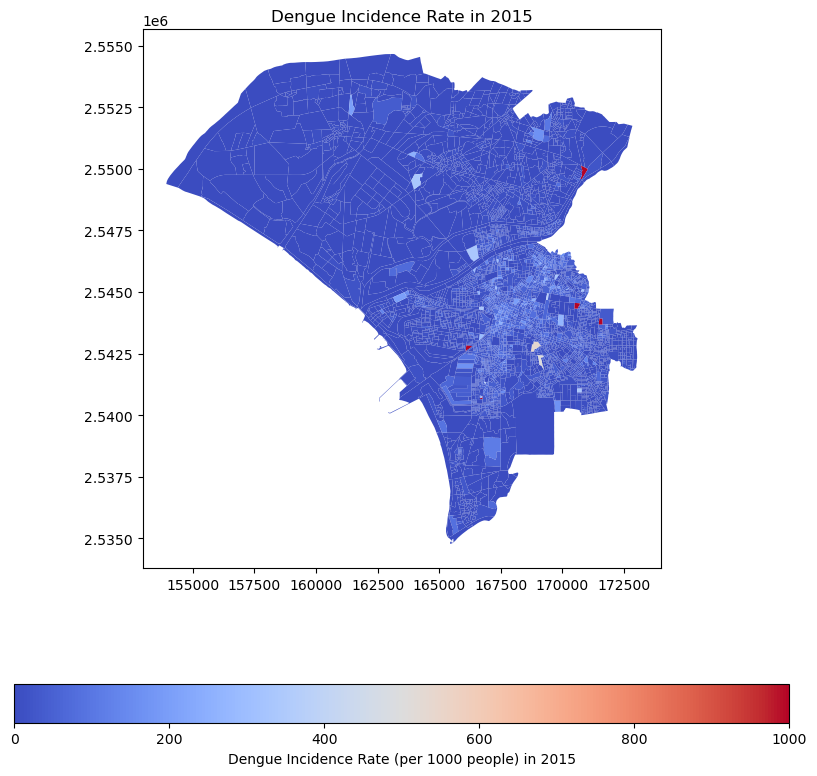

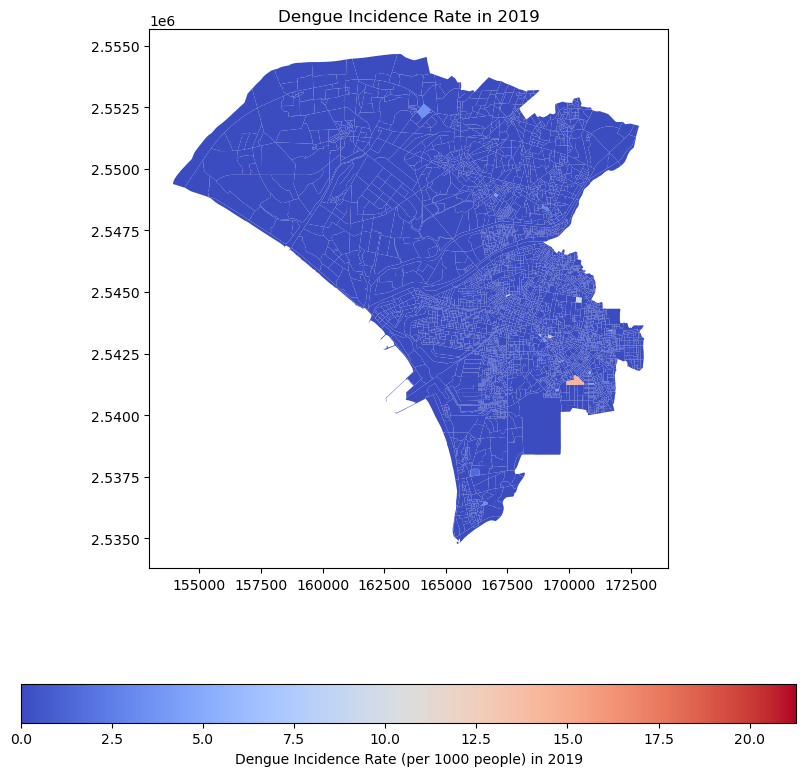

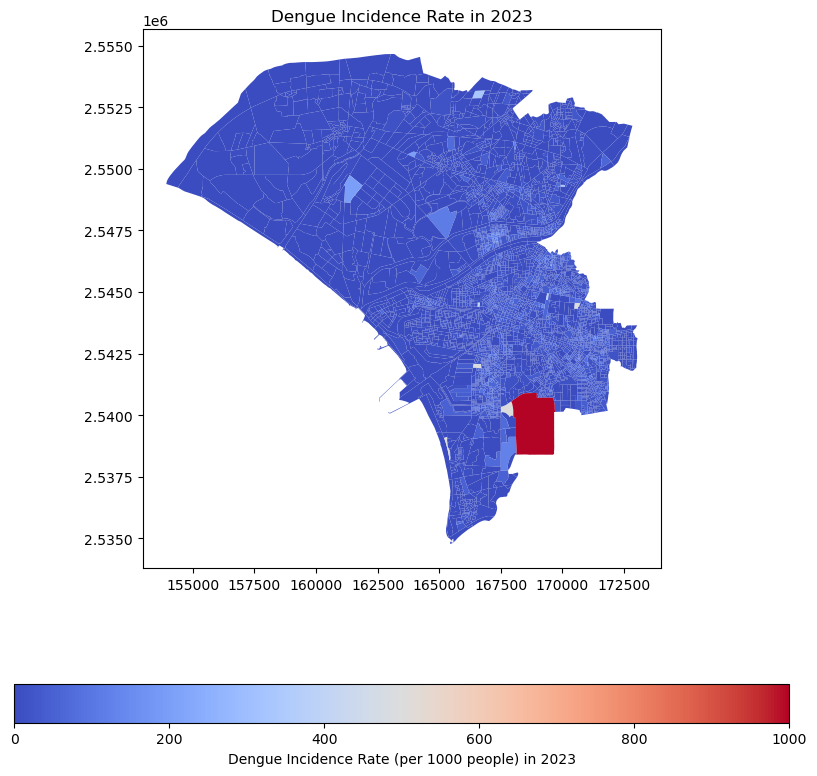

In [ ]:
# Fill missing values with a default value (e.g., 0 or -1, or use NaN for no data)
merged_2015['Incidence_Rate_2015'].fillna(0, inplace=True)  # Fill NaNs with 0 (or you can use np.nan)
merged_2019['Incidence_Rate_2019'].fillna(0, inplace=True)
merged_2023['Incidence_Rate_2023'].fillna(0, inplace=True)

# Plotting the choropleth map for 2015
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_2015.plot(column='Incidence_Rate_2015', ax=ax, legend=True,
                 legend_kwds={'label': "Dengue Incidence Rate (per 1000 people) in 2015",
                              'orientation': "horizontal"},
                 cmap='coolwarm',  # You can choose a different colormap
                 missing_kwds={'color': 'gray'})  # This sets the color for missing data
ax.set_title("Dengue Incidence Rate in 2015")
plt.show()

# Plotting the choropleth map for 2019
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_2019.plot(column='Incidence_Rate_2019', ax=ax, legend=True,
                 legend_kwds={'label': "Dengue Incidence Rate (per 1000 people) in 2019",
                              'orientation': "horizontal"},
                 cmap='coolwarm',
                 missing_kwds={'color': 'gray'})  # This sets the color for missing data
ax.set_title("Dengue Incidence Rate in 2019")
plt.show()

# Plotting the choropleth map for 2023
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_2023.plot(column='Incidence_Rate_2023', ax=ax, legend=True,
                 legend_kwds={'label': "Dengue Incidence Rate (per 1000 people) in 2023",
                              'orientation': "horizontal"},
                 cmap='coolwarm',
                 missing_kwds={'color': 'gray'})  # This sets the color for missing data
ax.set_title("Dengue Incidence Rate in 2023")
plt.show()

Script to create time series plots of weekly aggregated new infections.

In [ ]:
years_to_plot = [2015, 2019, 2023]
output_directory = "D:/Projects/TMU/Dengue"
os.makedirs(output_directory, exist_ok=True)

# Function to generate weekly aggregated plot for a given year
def plot_weekly_aggregated_counts(df, year, output_dir):
    df_year = df[df['Year'] == year]
    df_year['Week'] = df_year['發病日'].dt.isocalendar().week
    
    weekly_counts = df_year.groupby('Week').size()
    
    plt.figure(figsize=(10, 6))
    plt.plot(weekly_counts.index, weekly_counts.values, marker='o')
    plt.title(f'Weekly Dengue Cases - {year}')
    plt.xlabel('Week Number')
    plt.ylabel('Number of Cases')
    plt.grid(True)
    
    output_path = os.path.join(output_dir, f'dengue_weekly_{year}.png')
    plt.savefig(output_path)
    plt.close()
    return output_path

plot_weekly_aggregated_counts(filtered_tn_dengue, 2015, output_directory)
plot_weekly_aggregated_counts(filtered_tn_dengue, 2019, output_directory)
plot_weekly_aggregated_counts(filtered_tn_dengue, 2023, output_directory)


C:\Users\Patrick\AppData\Local\Temp\ipykernel_6396\2527858560.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['Week'] = df_year['發病日'].dt.isocalendar().week
C:\Users\Patrick\AppData\Local\Temp\ipykernel_6396\2527858560.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['Week'] = df_year['發病日'].dt.isocalendar().week
C:\Users\Patrick\AppData\Local\Temp\ipykernel_6396\2527858560.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

'D:/Projects/TMU/Dengue\\dengue_weekly_2023.png'